# Projet 3 : Concevez une application au service de la santé publique
## Notebook n°1 Nettoyage des données

## Sujet :
## L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

L'application que je propose est une application qui a pour but d'aider les consommateurs à mieux manger. L'application proposera, après avoir identifié le produit, de donner une note entre 0 et 100 qui tiendra compte de la qualité nutritionnelle du produit, et du caractère sain et écologique de celui-ci. Ensuite, cette aplication pourra éventuellement proposer un produit équivalent avec un meilleur score.


# 1. Chargement du dataset et exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator

from datetime import datetime
import time

from sklearn.model_selection import train_test_split
from sklearn import neighbors


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', None)


In [2]:
#Chargement du dataset et vérification, lecture des premières lignes
df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep = '\t', decimal = '.')
df.head()

/var/folders/11/rr01bdt55sb1r3f1t4_m_l2h0000gn/T/ipykernel_14334/4294851288.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fr.openfoodfacts.org.products.csv", sep = '\t', decimal = '.')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,NaN,NaN,N

In [3]:
#Types de données du dataset
types = df.dtypes
types = pd.DataFrame(types, columns = ['Types'])
types.T

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
Types,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object,object,object,float64,float64,object,float64,float64,object,float64,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [4]:
#Nombre de lignes et de colonnes
df.shape

(320772, 162)

In [5]:
#Lignes en double
df.duplicated().sum()

0

In [6]:
#Statistiques du dataset par colonne
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

# 2. Exploration des colonnes en fonction du sujet et du pourcentage de données manquantes par colonne

## 2.1 Exploration

In [7]:
#Liste des colonnes de départ :
list_colonnes = df.columns.values
list_colonnes

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_fr', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'allergens_fr', 'traces', 'traces_tags', 'traces_fr',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

In [8]:
#Recherche de la variable Nutriscore français
df['nutrition_grade_fr'].unique().tolist()

[nan, 'd', 'b', 'c', 'a', 'e']

In [9]:
#Nombre de données manquantes par colonne
df.isnull().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [10]:
#Pourcentage de données manquantes par colonne
nan_pourc = df.isna().mean()*100
nan_pourc = pd.DataFrame(nan_pourc, columns = ['Pourcentage de données manquantes'])
nan_pourc.index.name = 'Variables'
nan_pourc.reset_index(inplace = True)


#Affichage des variables pour lesquelles il y a moins de 30% de données manquantes :
nan_pourc.loc[nan_pourc['Pourcentage de données manquantes'] < 30, :]

,Variables,Pourcentage de données manquantes
0,code,0.007170
1,url,0.007170
2,creator,0.000623
3,created_t,0.000935
4,created_datetime,0.002806
5,last_modified_t,0.000000
6,last_modified_datetime,0.000000
7,product_name,5.537266
12,brands,8.857382
13,brands_tags,8.859876


## 2.2 Suppression de certaines lignes sans sens

In [11]:
#En voulant changer le type de la colonne "created_t", on a pu observer que 6 lignes étaient mal remplies (Dates d'ajout avec 'France', pas de code produit, et beaucoup de données manquantes)

df_clean = df.copy()
list_error = ['France', 'Villecresnes,Villeurbanne,France', 'Veynes,France' , 'Torcy 77,France', 'Montgermont', 'Saint-Priest,France', 'Villers Bocage 80260,France' , 'Marseille 5°,France', 'France,Nantes,Carquefou', 'Courrières,France', 'Brétigny-sur-Orge,Marseille 5°,France']
df_clean = df_clean[df_clean.created_t.isin(list_error) == False]
df_clean.drop(df_clean.loc[df_clean['created_t'].isnull()].index, inplace = True)
df_clean.shape










(320749, 162)

## 2.3 Suppression des produits non vendus en France

In [12]:
#Liste des pays :
list_countries = df_clean['countries'].unique().tolist()
list_countries

['en:FR',
 'US',
 'France',
 'en:GB',
 'France, US',
 'Canada',
 'United Kingdom',
 'en:CH',
 'en:ES',
 'Deutschland',
 'en:SI',
 'en:DE',
 'en:IT',
 'en:RO',
 'España',
 'en:AU',
 'en:PT',
 'United States',
 'Germany',
 'Usa',
 'France,Royaume-Uni',
 'UK,France',
 'France,Belgique,Pays-Bas,Royaume-Uni',
 'France,United Kingdom',
 'en:GP',
 'France,UK',
 'États-Unis',
 'Royaume-Uni,France',
 'en:CA',
 nan,
 'en:US,United Kingdom',
 'Switzerland',
 'en:US',
 'en:CA, US',
 'Nederland',
 'en:AU, en:france',
 'Australia',
 'France,Suisse,États-Unis,Canada',
 'États-Unis, en:france, US',
 'Ireland',
 'United Kingdom, US',
 'en:RE, en:france',
 'United States, en:france',
 'en:TW',
 'en:AU, Suisse',
 'Deutschland, en:france',
 'Suisse',
 'en:BR',
 'Belgique,France',
 'en:DO',
 'en:FR, US',
 'Belgique,France,Pays-Bas,Royaume-Uni',
 'France,United States',
 'Australie, US',
 'USA',
 'en:SA',
 'Saudi Arabia',
 'en:AE',
 'en:IQ',
 'en:KW',
 'Republica Moldova',
 'Belgium',
 'en:NC',
 'Singapore'

In [13]:
#Suppression des pays autres que France métropolitaine et DOM-TOM :
list_france = ['France', 'FR', 'en:FR', 'en:fr','en:FR,France',  'en:France', 'Frankreich','France,Guadeloupe',  'La Réunion', 'en:france','France, en:reunion', 'Guadeloupe,martinique','france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 'Guyane, en:france','French Guiana, en:france', 'French Guiana', 'Guyane,France','Guyane, France',  'France,French Guiana',  'Saint-Pierre-et-Miquelon, en:france', 'France,Saint-Pierre-et-Miquelon', 'Nouvelle-Calédonie', 'Nouvelle-Calédonie, en:france', 'Martinique','Martinique,france', 'France,Martinique',  'Guadeloupe','Guadeloupe, en:france', 'Guadeloupe,France', 'France,guadeloupe', 'Guadeloupe, France',  'France,Guyane', 'Polynésie française', 'La Réunion', 'France,Réunion','Guadeloupe,Martinique','Guadeloupe,Martinique,Guyane','Martinique,Guyane,Guadeloupe', 'Réunion, en:france','La Réunion,France', 'La Réunion, en:france', 'New Caledonia,France', 'New Caledonia',  'France,La Réunion', 'France, La Réunion', 'France', 'Mayotte','France, en:french-polynesia',  'Guadeloupe,Martinique, en:france', 'Guadeloupe,Martinique,Guyane, en:france']
df_clean = df_clean[(df_clean.countries.isin(list_france)) |  (df_clean.countries.str.contains('France', 'en:france'))]
df_clean['countries'].tolist()

['en:FR',
 'France',
 'en:FR',
 'France, US',
 'France',
 'France, US',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'en:FR',
 'en:FR',
 'en:FR',
 'France',
 'en:FR',
 'en:FR',
 'France',
 'France',
 'France',
 'en:FR',
 'France',
 'en:FR',
 'France',
 'France',
 'France',
 'France',
 'en:FR',
 'France',
 'en:FR',
 'France',
 'France',
 'en:FR',
 'en:FR',
 'France',
 'France',
 'en:FR',
 'France',
 'France',
 'en:FR',
 'en:FR',
 'en:FR',
 'France',
 'France',
 'France',
 'France',
 'en:FR',
 'France',
 'France',
 'France',
 'en:FR',
 'France,Royaume-Uni',
 'en:FR',
 'UK,France',
 'France',
 'UK,France',
 'UK,France',
 'France,Belgique,Pays-Bas,Royaume-Uni',
 'France,United Kingdom',
 'en:FR',
 'UK,France',
 'en:FR',
 'en:FR',
 'France',
 'France',
 'en:FR',
 'France,UK',
 'en:FR',
 'France',
 'France',
 'France,UK',
 'France,United Kingdom',
 'en:FR',
 'en:FR',
 'en:FR',
 'en:FR',
 'en:FR',
 'en:FR',
 'France',
 'en:FR',
 'Royaume-Uni,France'

## 2.4 Etude de la colonne Nom de produit

In [14]:
#Recherche des produits pour lesquels il n'y a ni product_name, ni generic_name, ni liste d'ingrédients :
df_clean.loc[(df_clean['product_name'].isnull()) & (df_clean['generic_name'].isnull()) & (df_clean['ingredients_text'].isnull())].shape

(7055, 162)

In [15]:
#Suppression des produits n'ayant pas de nom, pas de nom générique et pas de liste d'ingrédients :
df_clean.drop(df_clean.loc[(df_clean['product_name'].isnull()) & (df_clean['generic_name'].isnull()) & (df_clean['ingredients_text'].isnull())].index, inplace = True)
print("Il reste donc ", df_clean.shape[0], "produits dans l'application.")

Il reste donc  90550 produits dans l'application.


# 3. Traitement des données manquantes : 
## 3.1 1ère méthode : déduire de la colonne "generic_name" et éventuellement  "brands" en plus, le contenu de la colonne "product_name" pour les valeurs manquantes

In [16]:
#Produits concernés (produits qui n'ont pas de product_name mais un generic_name et éventuellement brands remplis)

df_nan = df_clean.loc[(df_clean['product_name'].isnull()) & (df_clean['generic_name'].isnull() == False) & (df_clean['brands'].isnull() == False)]
df_nan = pd.DataFrame(df_nan)

#Constitution du product_name de remplacement :
df_nan['product_name'] = df_nan['generic_name'] + ' Marque : ' + df_nan['brands']


#Remplacement :
df_clean.loc[(df_clean['generic_name'].isin(df_nan['generic_name'])) & (df_clean['product_name'].isnull()), 'product_name'] = df_nan['product_name'].values

#Produits concernés par une 2e vague (produits qui n'ont pas de product_name mais un generic_name) :
df_nan_2 = df_clean.loc[(df_clean['product_name'].isnull()) & (df_clean['generic_name'].isnull() == False)]

#Constitution du product_name de remplacement :
df_nan_2['product_name'] = df_nan_2['generic_name']


#Remplacement :
df_clean.loc[(df_clean['generic_name'].isin(df_nan_2['generic_name'])) & (df_clean['product_name'].isnull()), 'product_name'] = df_nan_2['product_name'].values


/var/folders/11/rr01bdt55sb1r3f1t4_m_l2h0000gn/T/ipykernel_14334/1450181932.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_2['product_name'] = df_nan_2['generic_name']


In [17]:
print("Nombre de produits n'ayant pas de product_name ni de generic_name :")
display(df_clean.loc[(df_clean['product_name'].isnull()) & (df_clean['generic_name'].isnull())])

Nombre de produits n'ayant pas de product_name ni de generic_name :


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
13136,16229902933,http://world-fr.openfoodfacts.org/produit/0016229902933/foco,openfoodfacts-contributors,1430920741,2015-05-06T13:59:01Z,1489143275,2017-03-10T10:54:35Z,NaN,NaN,520 ml,Canette,canette,"Foco, Thai Agri Foods Co. Ltd.","foco,thai-agri-foods-co-ltd",Jus de noix de coco,fr:jus-de-noix-de-coco,Jus-de-noix-de-coco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"France, US","en:france,en:united-states","France,États-Unis","Jus de jeune noix de coco (80%), eau, pulpe de noix de coco, sucre, acide citrique (E330).",NaN,NaN,NaN,NaN,NaN,240 ml (240 ml),NaN,1.0,[ jus-de-jeune-noix-de-coco -> fr:jus-de-jeune-noix-de-coco ] [ jus-de-jeune-noix-de -> fr:jus-de-jeune-noix-de ] [ jus-de-jeune-noix -> fr:jus-de-jeune-noix ] [ jus-de-jeune -> fr:jus-de-jeune ] [ jus-de -> fr:jus-de ] [ jus -> fr:jus ] [ 80 -> fr:80 ] [ eau -> fr:eau ] [ pulpe-de-noix-de-coco -> fr:pulpe-de-noix-de-coco ] [ pulpe-de-noix-de -> fr:pulpe-de-noix-de ] [ pulpe-de-noix -> fr:pulpe-de-noix ] [ pulpe-de -> fr:pulpe-de ] [ pulpe -> fr:pulpe ] [ sucre -> fr:sucre ] [ acide-citrique -> en:e330 -> exists -- ok ] [ e330 -> en:e330 ],en:e330,E330 - Acide citrique,0.0,NaN,NaN,0.0,NaN,NaN,NaN,b,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, e

In [18]:
#Suppression de ces produits :
df_clean.drop(df_clean.loc[(df_clean['product_name'].isnull()) & (df_clean['generic_name'].isnull())].index, inplace = True)
print("Il reste donc ", df_clean.shape[0], "produits dans l'application.")


Il reste donc  90512 produits dans l'application.


## 3.2 Création d'une colonne Bio bien renseignée

In [19]:
#Ajout d'une colonne "Bio" en Nan au départ, puis à remplir par "Bio" s'il est mentionné Bio ou Agriculture biologique dans certaines colonnes, et "Non bio" pour les autres produits :
df_clean['label_bio'] = np.nan
df_clean.loc[df_clean.labels_fr.str.contains('Bio', 'AB') == True,'label_bio' ] = 'Bio'
df_clean.loc[df_clean.ingredients_text.str.contains('Bio', 'AB') == True,'label_bio' ] = 'Bio'
df_clean.loc[df_clean.product_name.str.contains('Bio', 'AB') == True,'label_bio' ] = 'Bio'
df_clean['label_bio'].fillna("Non bio", inplace = True)




## 3.3 Recherche de la colonne catégorie de produit

In [20]:
#Exploration des valeurs
df_clean['main_category_fr'].unique().tolist()

[nan,
 'Filet-de-boeuf',
 'Aliments et boissons à base de végétaux',
 'Sablés',
 'Bonbons',
 'Thés',
 'Sirops',
 'Sodas',
 'Sodas aux fruits',
 'Gâteaux',
 'Pâtisseries',
 'Viandes',
 'Poissons et viandes et oeufs',
 'Pate-au-foie-de-canard',
 'Condiments',
 'Cookies',
 'Plats à base de viande',
 'en:Carrot-coriander-soup',
 'en:Charcuteries',
 'Soupes',
 'Chocolats',
 'en:Harengs',
 'Boissons',
 'Fromages de vache',
 'it:Vinaigre-balsamique',
 'Pâtes à tartiner',
 'Sandwichs',
 'Chips et frites',
 'Surgelés',
 'Sauce-aux-piments',
 'Epicerie',
 'Crustacés',
 'Biscuits',
 'en:Vanilla-soymilk',
 'Snacks salés',
 'Fruits à coques',
 'Vinaigres',
 'Produits à tartiner',
 'Plats préparés',
 'Fromages',
 'Nuggets-de-dinde',
 'Petit-déjeuners',
 'Pancake',
 'Conserves',
 'en:Coconut-creams',
 'Laits',
 'Jus de fruits',
 'en:Coconut-waters',
 'Beurres',
 'Sodas light',
 'Pain-a-l-ail',
 'Sauces-de-poisson',
 'Confitures',
 'Produits à tartiner salés',
 'Pains',
 'Snacks sucrés',
 'Thés verts'

In [21]:
#Exploration des valeurs
df['pnns_groups_1'].unique().tolist()


[nan,
 'unknown',
 'Fruits and vegetables',
 'Sugary snacks',
 'Cereals and potatoes',
 'Composite foods',
 'Fish Meat Eggs',
 'Beverages',
 'Fat and sauces',
 'fruits-and-vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'sugary-snacks',
 'cereals-and-potatoes',
 'salty-snacks']

In [22]:
#Exploration des valeurs
df['pnns_groups_2'].unique().tolist()



[nan,
 'unknown',
 'Vegetables',
 'Biscuits and cakes',
 'Bread',
 'Legumes',
 'Pizza pies and quiche',
 'Meat',
 'Sweets',
 'Non-sugared beverages',
 'Sweetened beverages',
 'Dressings and sauces',
 'One-dish meals',
 'vegetables',
 'Soups',
 'Chocolate products',
 'Alcoholic beverages',
 'Fruits',
 'Sandwich',
 'Cereals',
 'Milk and yogurt',
 'Fats',
 'Cheese',
 'Appetizers',
 'Nuts',
 'Breakfast cereals',
 'Artificially sweetened beverages',
 'Fruit juices',
 'Eggs',
 'Fish and seafood',
 'Dried fruits',
 'Ice cream',
 'Processed meat',
 'Potatoes',
 'Dairy desserts',
 'Fruit nectars',
 'pastries',
 'Tripe dishes',
 'fruits',
 'Salty and fatty products',
 'cereals',
 'legumes',
 'nuts']

In [23]:
#Choix de la colonne 'pnns_groups_1' comme catégorie de produit et traitement de cette colonne :
#Remplacement de la valeur 'unknown' par Nan pour pnns_groups_1 :

df_clean.loc[df_clean['pnns_groups_1'] == 'unknown','pnns_groups_1'] = np.nan

df_clean['pnns_groups_1'].unique().tolist()

[nan,
 'Cereals and potatoes',
 'Sugary snacks',
 'Beverages',
 'Fish Meat Eggs',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products',
 'Salty snacks',
 'Fat and sauces',
 'fruits-and-vegetables',
 'sugary-snacks',
 'cereals-and-potatoes']

In [24]:
#Regroupement des catégories dans la colonne pnns_groups_1 :
df_clean.loc[df_clean['pnns_groups_1'] == 'fruits-and-vegetables', 'pnns_groups_1'] = 'Fruits and vegetables'
df_clean.loc[df_clean['pnns_groups_1'] == 'sugary-snacks', 'pnns_groups_1'] = 'Sugary snacks'
df_clean.loc[df_clean['pnns_groups_1'] == 'cereals-and-potatoes', 'pnns_groups_1'] = 'Cereals and potatoes'
df_clean.loc[df_clean['pnns_groups_1'] == 'salty-snacks', 'pnns_groups_1'] = 'Salty snacks'



In [25]:
#Différences entre pnns_groups_1 et pnns_groups_2 :
df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) & (df_clean['pnns_groups_2'].isnull() == False),'pnns_groups_2'].unique().tolist()


['unknown', 'Alcoholic beverages', 'Tripe dishes']

In [26]:
#Imputation de valeur pour pnns_groups_1 :
df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) & (df_clean['pnns_groups_2'] == 'Alcoholic beverages'), 'pnns_groups_1'] = 'Beverages'
df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) & (df_clean['pnns_groups_2'] == 'Tripe dishes'), 'pnns_groups_1'] = 'Fish Meat Eggs'


## Les produits sont donc classés par catégorie :
## 9 catégories :
'Sugary snacks',
'Beverages',
'Fish Meat Eggs',
'Composite foods',
'Fruits and vegetables',
'Milk and dairy products',
'Fat and sauces',
'Salty snacks',
'Cereals and potatoes'

# 4. Choix des colonnes et traitement

In [28]:
#Choix des colonnes à garder :

colonnes_a_garder = ['code', 'created_datetime', 'product_name', 'pnns_groups_1', 'quantity', 'brands', 'label_bio', 'stores', 'countries_fr', 'ingredients_text', 'allergens','energy_100g' , 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'proteins_100g', 'additives_n', 'sugars_100g', 'salt_100g', 'ingredients_from_palm_oil_n', 'fiber_100g', 'fruits-vegetables-nuts_100g', 'nutrition_grade_fr']
df_clean = df_clean[colonnes_a_garder]
list_colonnes_new = df_clean.columns.values






In [29]:
#Rappel du nombre de produits dans l'application :
print("Il reste ", df_clean.shape[0], "produits dans l'application.")


Il reste  90512 produits dans l'application.


## 4.1 Suppression de certains produits

In [30]:
#Suppression des produits ne contenant pas assez d'information :
colonnes_indispensables_or_nom = ['ingredients_text', 'energy_100g' ,  'saturated-fat_100g', 'carbohydrates_100g', 'proteins_100g', 'additives_n', 'sugars_100g', 'salt_100g', 'ingredients_from_palm_oil_n', 'fiber_100g', 'fruits-vegetables-nuts_100g', 'nutrition_grade_fr']


#Suppression de ces produits :

df_clean.dropna(subset = colonnes_indispensables_or_nom, thresh=3, inplace = True)

print("Il reste donc ", df_clean.shape[0], "produits dans l'application.")

Il reste donc  73270 produits dans l'application.


In [31]:
#Pourcentage de données non nulles par colonne :
nan_pourc = round(100 - df_clean.isna().mean()*100, 2)
nan_pourc = pd.DataFrame(nan_pourc, columns = ['Pourcentage de données non nulles'])
nan_pourc.index.name = 'Variables'
nan_pourc.reset_index(inplace = True)
nan_pourc

,Variables,Pourcentage de données non nulles
0,code,100.00
1,created_datetime,100.00
2,product_name,100.00
3,pnns_groups_1,68.51
4,quantity,78.51
5,brands,99.59
6,label_bio,100.00
7,stores,50.42
8,countries_fr,100.00
9,ingredients_text,72.35


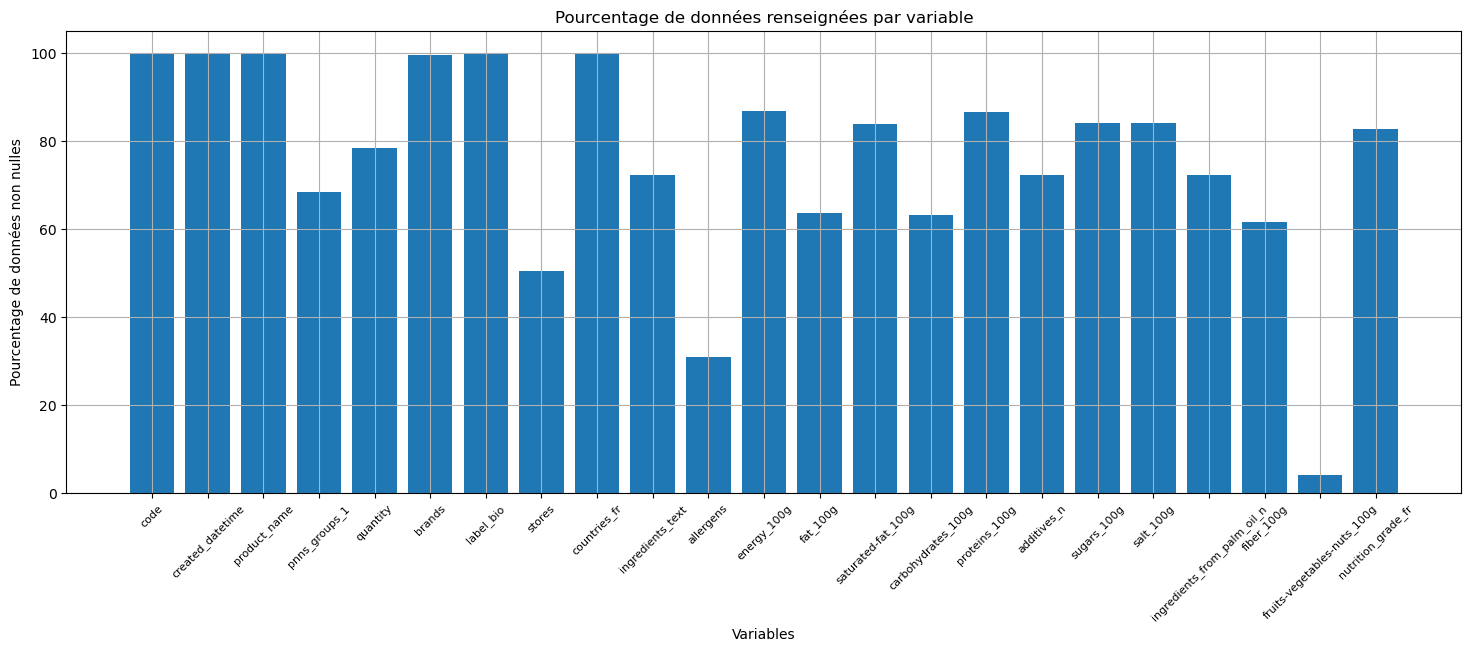

In [32]:
#Diagramme à barres de ces données :
plt.figure(figsize=(18,6))
axes = plt.gca()

axes.xaxis.set_ticks(range(nan_pourc.shape[0]))
plt.bar(height = nan_pourc['Pourcentage de données non nulles'], x=nan_pourc['Variables'])

axes.set_xticklabels(labels = nan_pourc['Variables'], rotation = 45, size = 8)

axes.set_xlabel('Variables')
axes.set_ylabel('Pourcentage de données non nulles')
axes.set_title("Pourcentage de données renseignées par variable")
axes.set_ylim(0,105)

plt.grid()
plt.show()

In [33]:
print(" Il y a donc ", nan_pourc.shape[0], "variables restantes avec plus ou moins d'informations pour chacune.")

 Il y a donc  23 variables restantes avec plus ou moins d'informations pour chacune.


In [34]:
#Nombre de produits n'ayant pas de categorie :
df_clean.loc[df_clean['pnns_groups_1'].isnull() == True].shape[0]

23075

In [35]:
#Attribution de categorie aux produits n'en ayant pas :
list_boissons = ['jus', 'Jus', 'Côte du Rhône', 'Tomates aux Vermicelles', 'soupe', 'Infusion', 'eau', 'Milo Tin', 'Birne', 'Minute Maid','Whey', 'Tea', 'café', 'Mucho Mango', 'Presse', 'boisson', 'thé', 'Lait De Soja', 'Lait Soja', 'Drink', 'pressé', 'Lait de coco', 'Sauvignon', "KickStart", 'Orange Juice', 'SKOL', 'Beer', 'Juice', 'Apfel', 'Ocean Spray', 'Liquid Water', 'Lipton']
list_sucreries = ['Bonbon', 'Praliné', 'Cheese cake','Confettis', "M&m's", "M&S", "Cheescake", 'Beignets', 'confiture', "chocolat", "chocolaté", "Fischerman's Friend - Spearmint" , 'Muffins', 'Reglisde', 'Soda', 'Sparkling', 'Lemon dental mints', 'Crumble', 'Smoothie ', 'soya pots', 'Nutela', 'nutella', 'Miel', 'Mini bites', 'Sweets', 'peanut butter', 'Syrup', 'Galette frangipane ', 'Grignotines', 'Cacao', "Les Recettes De L'atelier", 'Milano', 'financier', 'Bronsugar', 'dessert', 'punch', 'Granola', 'Biscuits', 'Pies', 'Arn Tim Tam Bites 170G', 'Paskesz Sour Belts 4X4 4 Oz', 'Caramel', 'Crunchie', 'Bagels', 'Sour', 'Candy', 'Cookie', 'Nougat', 'Danette', 'Sucette', 'Shop reis waffeln', 'McVities Digestives', 'Ragusa Noir', 'Suprême Vanille Bourbon', "Suprême Bouquet D'oranges Noir", 'SAN ANTONIO MINI PANDORINI', 'Pic-nic Break 50G', 'Mints', 'Sirop', 'Lion', 'Bounce', 'Sablés', 'cakes']
list_cereales = ['Farine', "Pates Langue d'oiseau", 'pates', 'pâtes', 'riz', 'couscous', 'bread', 'Eat Natural Protein Packed', 'quinoa', 'Grain', 'Noodles', 'galettes bretonnes', 'pain', 'Curry Flavour', 'Mini meloui', 'Rice', 'Almonds', 'Biscottes', 'Cashews', 'Pistachios', 'Croutons', 'Weet-bix', "Porridge", 'Protein Bar', 'Ebly', 'Farmer Croc, Schokolade', 'Terrasuisse Vollkornmehl', 'Farmer Flakes Schokolade 500G', 'Garofalo Linguine Pasta', '500G RIGATONI BARILLA', 'Spaghetti', 'Cereal']
list_fruits_legumes =['Amandes', 'Amandino', 'Poireaux', 'Apfelmus', 'Pomme ', 'Ciboulette', 'Shallots', 'Almond', 'Mini Snack Raisins', 'Dates', 'Mezzetta Jalapeno Peppers Deli-sliced, Tamed', 'Cornichon', 'Champignons', 'Edel-Nuss-Mix', 'Mais', 'maïs', 'Mandeln Migros Classic, Nüsse', 'Coeurs de Palmier', 'Bamboo', 'bambou''vinegar', 'vinaigre', 'coco', 'Coconut', 'légumes', 'Sel', 'carrots', 'marrons', 'mango', 'épices', 'Cœurs de palmier']
list_gras = ['Terrine', "Fruit  d'or", "Huile d'olive ", 'Tartina de foie', 'ketchup', 'Croissant', 'Sauce', 'Moutarde Posh Dog', 'mayonnaise', 'moutarde', 'TABASCO', 'Chili Habanero', "Jack Daniel's barbecue", '165G SMT RRD RST TOMATO BASIL']
list_trans =['Takikomi recette japonaise riz vapeur aux légumes et aux fruits de mer', 'BoFrost Nudelpfanne', 'Fluteaux de jambon', 'Le Paris', 'Lasagne', 'Tartiflette', 'Sauerkraut', 'Wrappy', 'Bakes', 'Ravioli', 'Tripes', 'Pizza', 'Margarine', 'Tofurky Smoky Maple Bacon Tempeh Rashers', "Wrap", 'Bowl',"Beechers Mac & Cheese World's Best", "Gyros", 'Butterfly', 'Naturaplan Bio Prosciutto Rustico', 'Rollmop', 'Tofou', 'Pudding']
list_viande = ['Lardons', 'Tuna', 'thon', 'Colin ', 'Kabeljau', 'Poulpe', 'Vorderschinken Terrasuisse', 'ham', 'jambon']
list_lait = ['Cornish Cruncher & Balsamic Onion', 'renutryl', 'custard', 'crème', 'fromage', 'lait', 'Total 2%', 'Yogurt', 'yaourt', 'Farmers Choice', 'Mndla R / Fat Nat Van Yog', 'cream', 'Zymil', 'Gala Nature', 'Caffe Latte Macchiato Emmi 370 Ml, 1 Pièce', 'Mozzarella', 'Crema Bel Paese', 'Creme']
list_snacks = ['Super ring', 'Chips', 'Mélange Fruits Tropicaux', 'Pois Wasabi ', 'Fruit Snack ', 'Crackers', 'Patato Crisps', 'Clix Arnott', 'Cheddar', 'cracker']



for mot in list_boissons :
    df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) &   (df_clean.product_name.str.contains(mot, case = False)), 'pnns_groups_1'] = 'Beverages'

for mot in list_sucreries :
    df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) &   (df_clean.product_name.str.contains(mot, case = False)), 'pnns_groups_1'] = 'Sugary snacks'

for mot in list_cereales :
    df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) &   (df_clean.product_name.str.contains(mot, case = False)), 'pnns_groups_1'] = 'Cereals and potatoes'
    
for mot in list_fruits_legumes :
    df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) &   (df_clean.product_name.str.contains(mot, case = False)), 'pnns_groups_1'] = 'Fruits and vegetables' 
    
for mot in list_gras :
    df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) &   (df_clean.product_name.str.contains(mot, case = False)), 'pnns_groups_1'] = 'Fat and sauces'
    
for mot in list_trans :
    df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) &   (df_clean.product_name.str.contains(mot, case = False)), 'pnns_groups_1'] = 'Composite foods'
    
for mot in list_viande :
    df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) &   (df_clean.product_name.str.contains(mot, case = False)), 'pnns_groups_1'] = 'Fish Meat Eggs'
    
for mot in list_lait :
    df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) &   (df_clean.product_name.str.contains(mot, case = False)), 'pnns_groups_1'] = 'Milk and dairy products'
    
for mot in list_snacks :
    df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) &   (df_clean.product_name.str.contains(mot, case = False)), 'pnns_groups_1'] = 'Salty snacks'
    

In [36]:
#Nombre de produits n'ayant pas de categorie :
df_clean.loc[df_clean['pnns_groups_1'].isnull() == True].shape[0]

12799

In [37]:
#Suppression de produits non alimentaires et qui ne conviennent pas :
df_clean.drop(index = [320741, 319764, 21667, 318627], axis = 0, inplace = True)


In [38]:
#Suppression des produits sans liste d'ingrédients :
df_clean.drop(df_clean.loc[(df_clean['pnns_groups_1'].isnull() == True) & (df_clean['ingredients_text'].isnull() == True)].index, axis = 0, inplace = True)

#Nombre de produits n'ayant toujours pas de categorie :
print("Produits n'ayant toujours pas de catégorie :", df_clean.loc[df_clean['pnns_groups_1'].isnull() == True].shape[0])





Produits n'ayant toujours pas de catégorie : 4271


In [39]:
#Suppression de ces produits :
df_clean.drop(df_clean.loc[df_clean['pnns_groups_1'].isnull() == True].index, axis = 0, inplace = True)

In [40]:
print("Nombre de produits dans l'application :", df_clean.shape[0])

Nombre de produits dans l'application : 60470


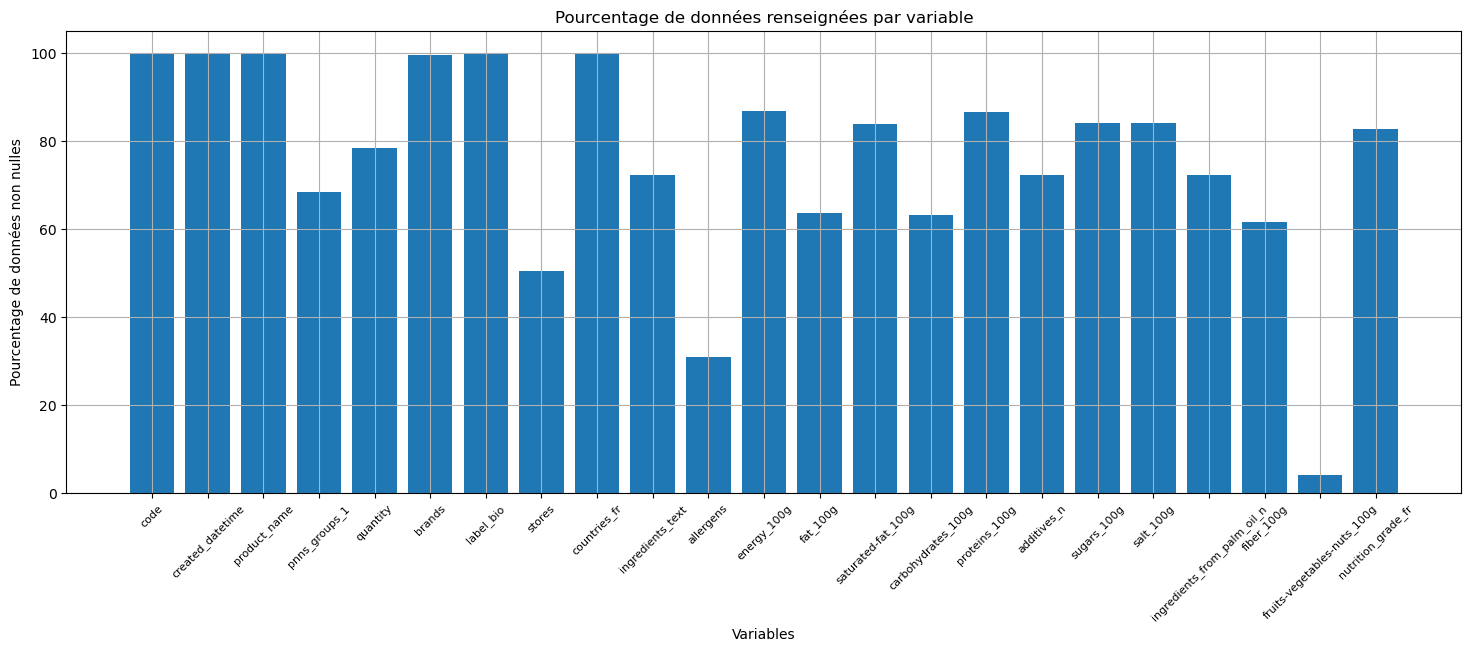

In [41]:
#Diagramme à barres de ces données après dernière suppression de produits :
plt.figure(figsize=(18,6))
axes = plt.gca()

axes.xaxis.set_ticks(range(nan_pourc.shape[0]))
plt.bar(height = nan_pourc['Pourcentage de données non nulles'], x=nan_pourc['Variables'])

axes.set_xticklabels(labels = nan_pourc['Variables'], rotation = 45, size = 8)

axes.set_xlabel('Variables')
axes.set_ylabel('Pourcentage de données non nulles')
axes.set_title("Pourcentage de données renseignées par variable")
axes.set_ylim(0,105)

plt.grid()
plt.show()

## 4.2 Uniformisation des types des colonnes sélectionnées

In [42]:
#def types_colonnes (df):
                

df_clean['created_datetime'] = pd.to_datetime(df_clean['created_datetime'])
df_clean['code'] = df_clean['code'].astype(float)


types = df_clean.dtypes
types = pd.DataFrame(types)
types.head(50)


,0
code,float64
created_datetime,"datetime64[ns, UTC]"
product_name,object
pnns_groups_1,object
quantity,object
brands,object
label_bio,object
stores,object
countries_fr,object
ingredients_text,object


## 4.3 Détection des valeurs aberrantes

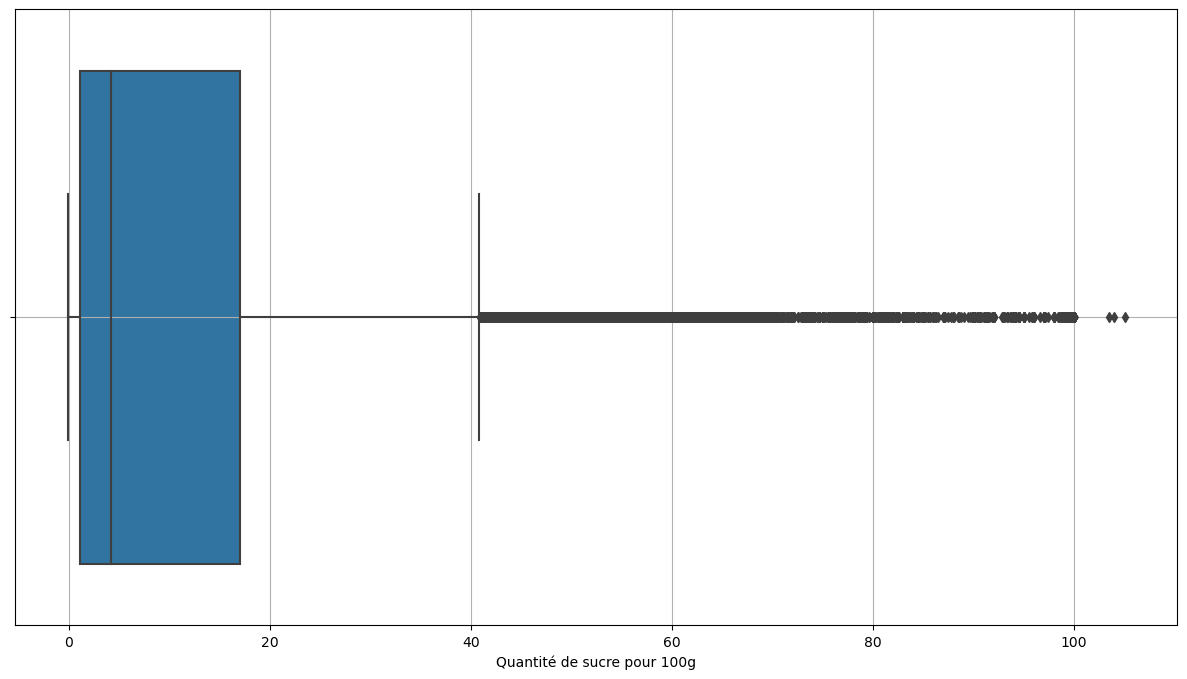

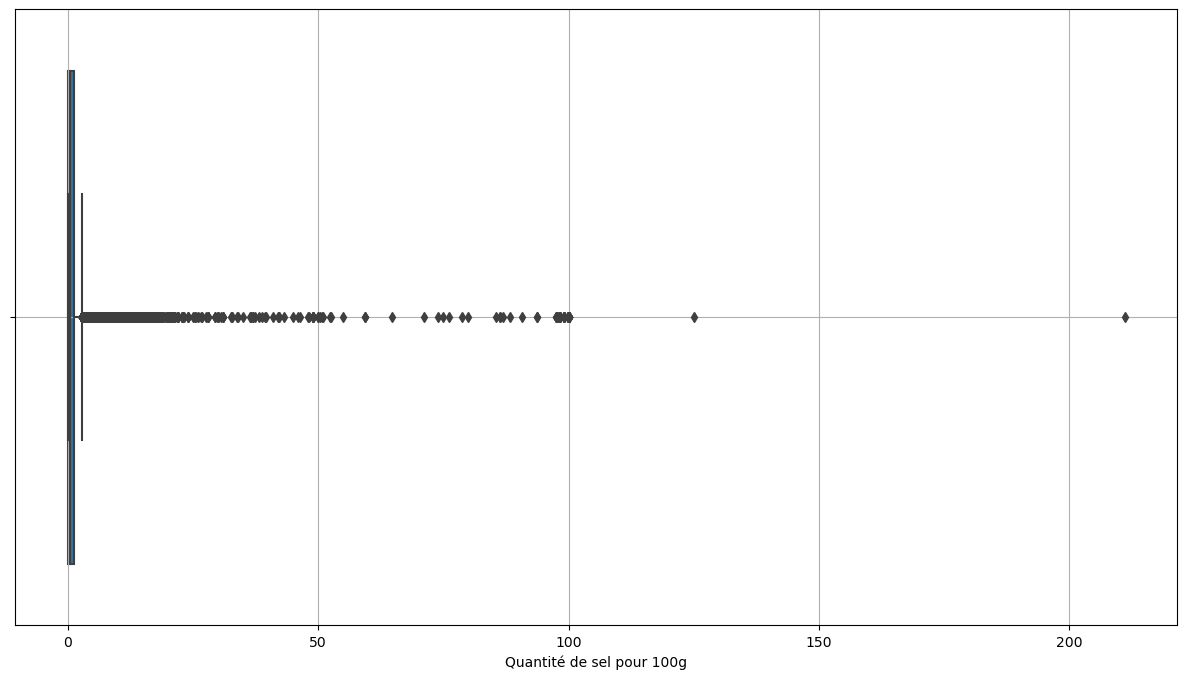

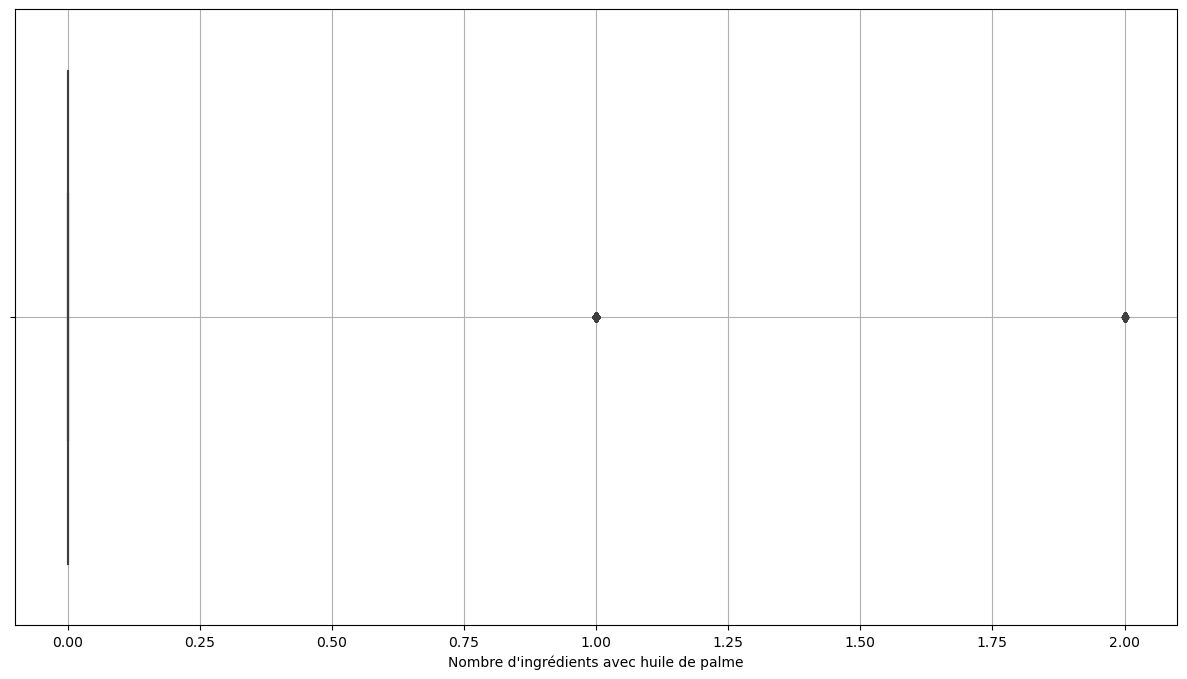

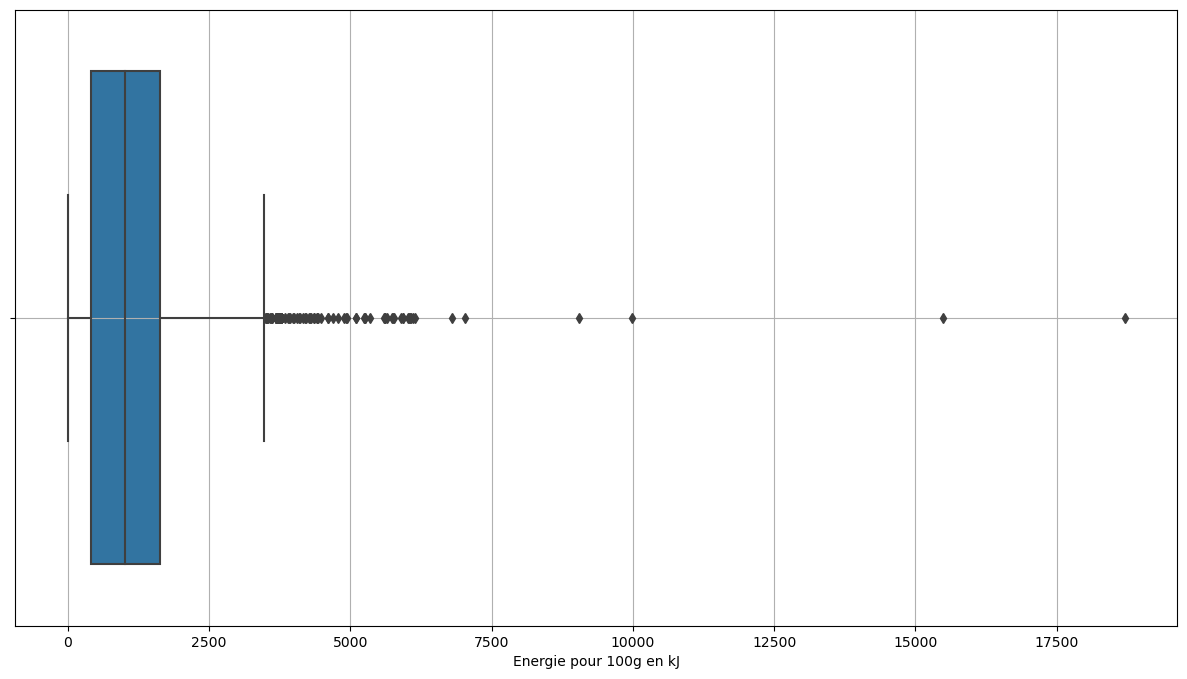

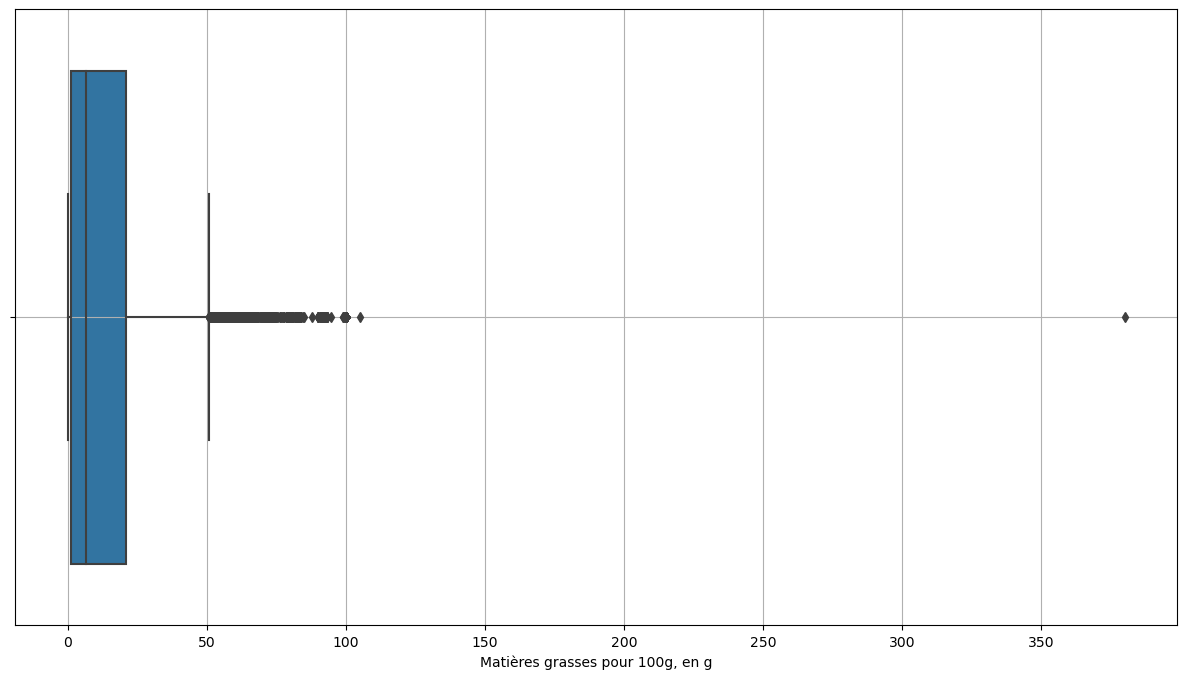

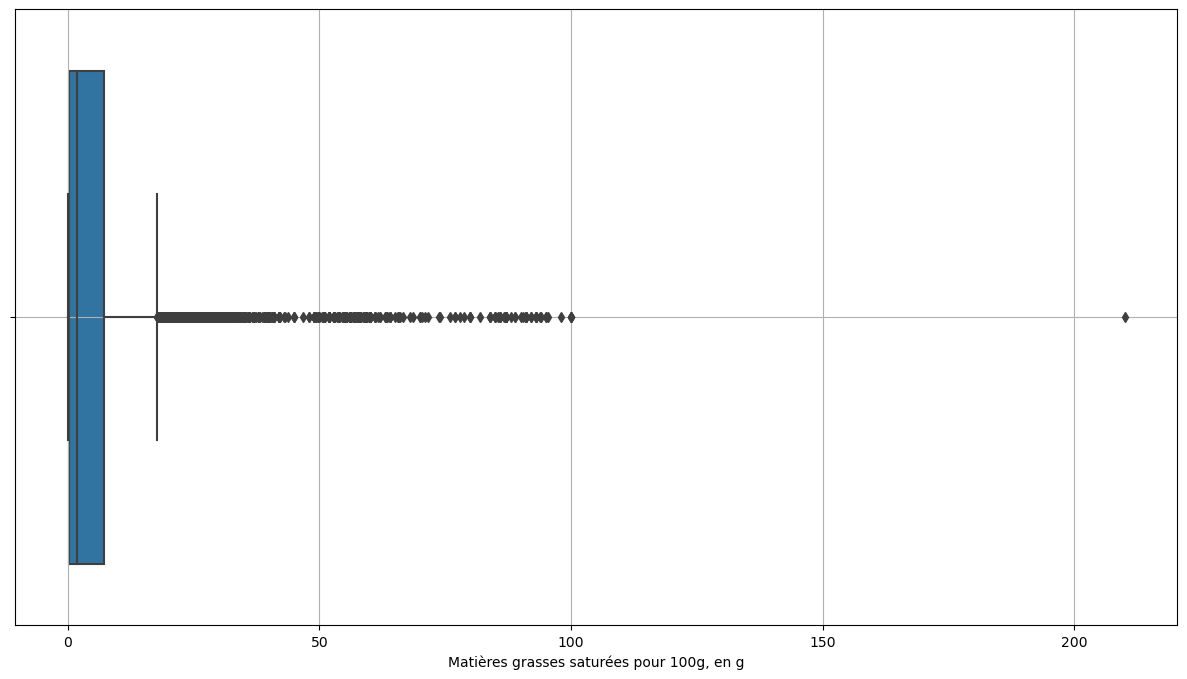

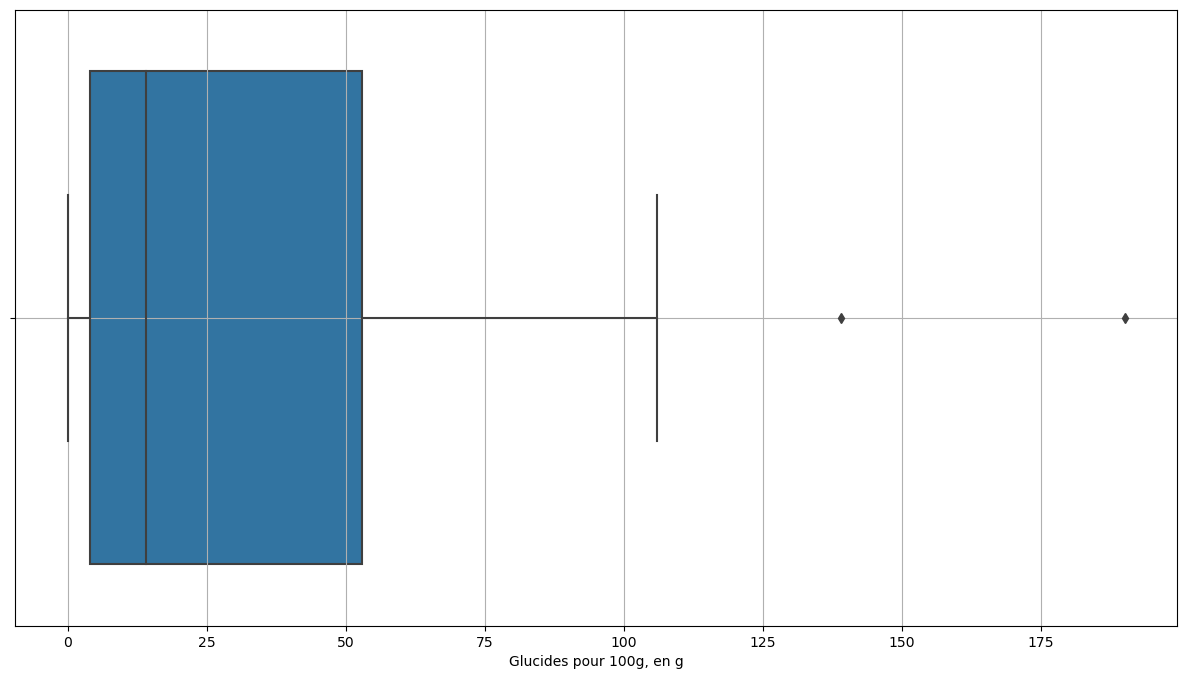

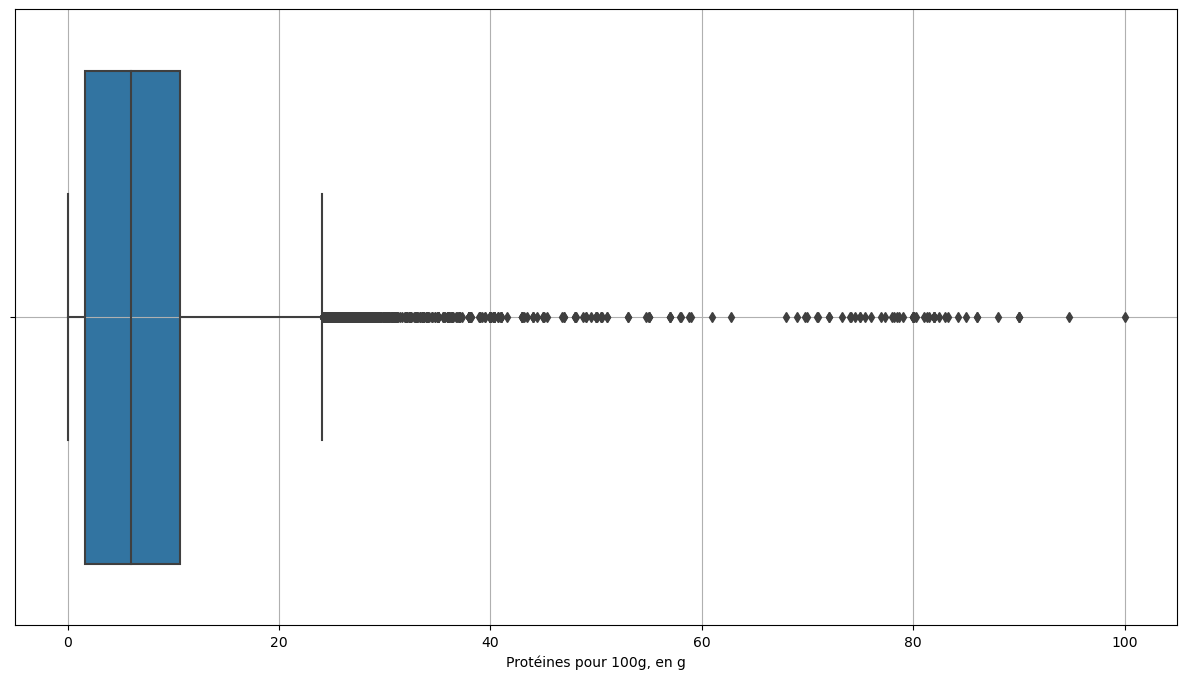

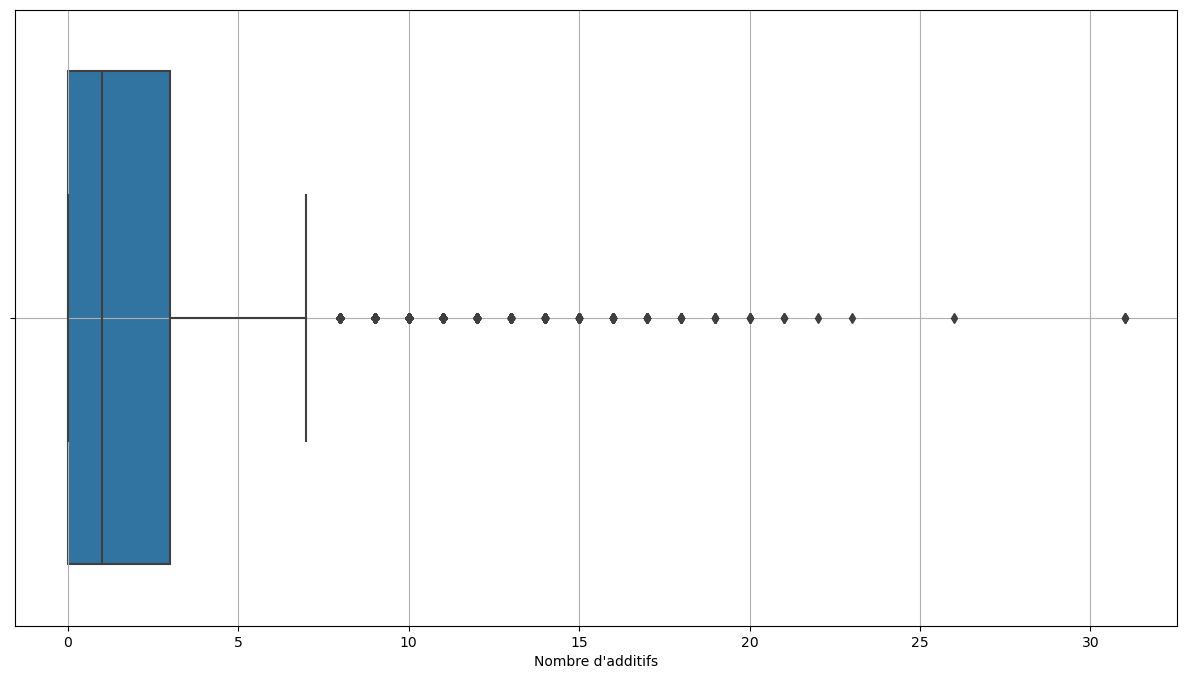

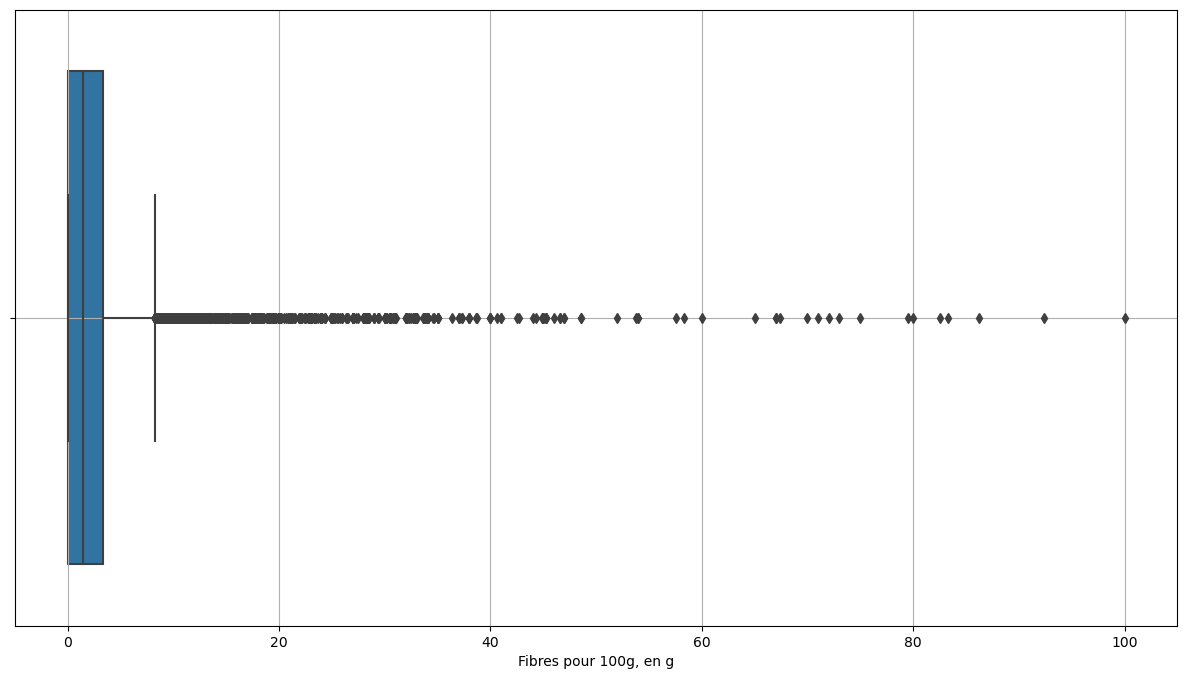

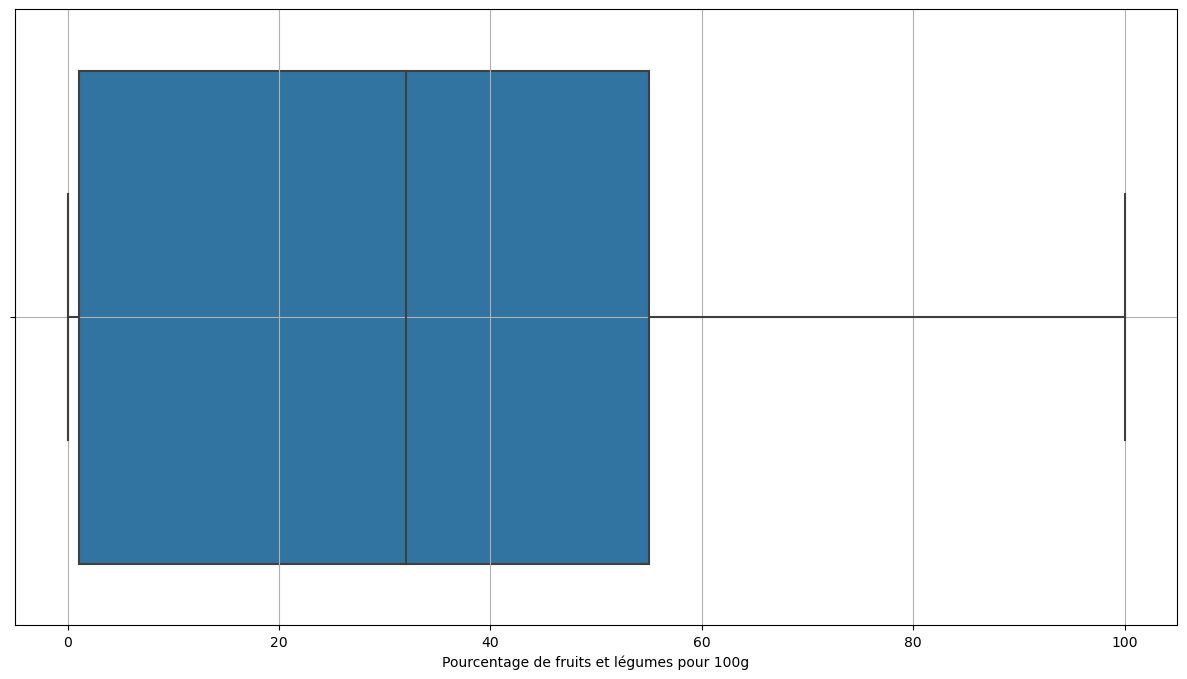

In [43]:
#Boîte à moustaches pour sugars_100g
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'sugars_100g', orient = "h")
plt.xlabel('Quantité de sucre pour 100g')
plt.grid()
plt.show()

#Boîte à moustaches pour salt_100g
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'salt_100g', orient = "h")
plt.xlabel('Quantité de sel pour 100g')
plt.grid()
plt.show()

#Boîte à moustaches pour ingredients_from_palm_oil_n
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'ingredients_from_palm_oil_n', orient = "h")
plt.xlabel("Nombre d'ingrédients avec huile de palme")
plt.grid()
plt.show()

#Boîte à moustaches pour energy_100g
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'energy_100g', orient = "h")
plt.xlabel("Energie pour 100g en kJ")
plt.grid()
plt.show()

#Boîte à moustaches pour fat_100g
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'fat_100g', orient = "h")
plt.xlabel("Matières grasses pour 100g, en g")
plt.grid()
plt.show()

#Boîte à moustaches pour saturated-fat_100g
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'saturated-fat_100g', orient = "h")
plt.xlabel("Matières grasses saturées pour 100g, en g")
plt.grid()
plt.show()

#Boîte à moustaches pour carbohydrates_100g
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'carbohydrates_100g', orient = "h")
plt.xlabel("Glucides pour 100g, en g")
plt.grid()
plt.show()


#Boîte à moustaches pour proteins_100g
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'proteins_100g', orient = "h")
plt.xlabel("Protéines pour 100g, en g")
plt.grid()
plt.show()

#Boîte à moustaches pour additives_n
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'additives_n', orient = "h")
plt.xlabel("Nombre d'additifs")
plt.grid()
plt.show()


#Boîte à moustaches pour fiber_100g
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'fiber_100g', orient = "h")
plt.xlabel("Fibres pour 100g, en g")
plt.grid()
plt.show()

#Boîte à moustaches pour fruits-vegetables-nuts_100g
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'fruits-vegetables-nuts_100g', orient = "h")
plt.xlabel("Pourcentage de fruits et légumes pour 100g")
plt.grid()
plt.show()





In [44]:
#Suppression des valeurs supérieures à 100g ou 100% dans les colonnes indiquées :
df_clean.loc[df_clean['sugars_100g'] > 100, 'sugars_100g'] = np.nan
df_clean.loc[df_clean['salt_100g'] > 100, 'salt_100g']  = np.nan
df_clean.loc[df_clean['fat_100g'] > 100, 'fat_100g']  = np.nan
df_clean.loc[df_clean['saturated-fat_100g'] > 100, 'saturated-fat_100g']  = np.nan
df_clean.loc[df_clean['carbohydrates_100g'] > 100, 'carbohydrates_100g']  = np.nan
df_clean.loc[df_clean['proteins_100g'] > 100, 'proteins_100g']  = np.nan
df_clean.loc[df_clean['fiber_100g'] > 100, 'fiber_100g']  = np.nan
df_clean.loc[df_clean['fruits-vegetables-nuts_100g'] > 100, 'fruits-vegetables-nuts_100g']  = np.nan









In [45]:
#Sélection des outliers pour additives_n :
q1_add=df_clean['additives_n'].quantile(0.25)
q3_add=df_clean['additives_n'].quantile(0.75)

IQR_add=q3_add-q1_add

outliers_add = pd.DataFrame()
outliers_add = df_clean[(df_clean['additives_n']<(q1_add-1.5*IQR_add)) | (df_clean['additives_n']>(q3_add+1.5*IQR_add))]
outliers_add = pd.DataFrame(outliers_add)
outliers_add[['additives_n', 'ingredients_text','product_name']]

,additives_n,ingredients_text,product_name
283,11.0,"Fruits 37.4% [fruits confits 21,5% [fruits (pastèque, bigarreaux, écorce d’orange), sirop de glucose-fructose, sucre, conservateurs : sorbate de potassium - anhydride sulfureux, colorants : caramel ordinaire - E120, E133, correcteur d’acidité : acide citrique], raisins secs au rhum 15.9%, farine de blé, huile de colza, œufs frais, sucre, sirop de glucose-fructose, stabilisant : glycérol, poudres à lever : carbonates d’ammonium - carbonates de sodium - diphosphates (blé), sel, émulsifiants : mono et diglycérides d’acides gras, lait écrémé en poudre, arôme naturel d’orange.",Cakes aux Fruits
301,8.0,"Sucre, blanc d’_œufs_ frais, poudre d’_amande_ 16.5%, _beurre_ pâtissier, farine de _blé_, pépites au citron 7% (sucre, pomme, pulpe de citron 18.1%*, dextrose, fibres d’ananas, gélifiant : alginate de sodium, correcteurs d’acidité : acide citrique - citrates de potassium, stabilisant : phosphates de calcium, arôme naturel de citron, colorant : curcumine), _œufs_ frais, sirop de glucose-fructose, stabilisant : glycérol, poudre de citron 0.9 % (équivalent à 5% de jus de citron) (jus concentré de citron, maltodextrine), sel, poudres à lever : carbonates de sodium - diphosphates (_blé_), arôme naturel de citron. *% exprimé sur les pépites équivalent à 1.2% sur l’ensemble du produit.",Fondants Citron
428,10.0,"Pâtisseries fourrées à la pulpe de pêche : farine de blé, fourrage pêche 20% (sirop de glucose-fructose, purée de pêche 50%*, sucre, gélifiant : pectines, correcteurs d’acidité : acide citrique - citrates de sodium, arômes, conservateur : sorbate de potassium), huile de colza, œufs frais, sucre, sirop de glucose-fructose, stabilisant : glycérol, poudres à lever : carbonates d’ammonium - carbonates de sodium - diphosphates (blé), sel, lait écrémé en poudre, émulsifiants : mono et diglycérides d’acides gras, arôme. *% exprimé sur le fourrage équivalent à 10% sur l’ensemble du produit. Pâtisseries fourrées à la pulpe d'abricot : farine de blé, fourrage abricot 20% (sirop de glucose-fructose, purée d'abricot 50%*, sucre, gélifiant : pectines, correcteurs d’acidité : acide citrique - citrates de sodium, arômes, conservateur : sorbate de potassium), huile de colza, œufs frais, sucre, sirop de glucose-fructose, stabilisant : glycérol, poudres à lever : carbonates d’ammonium - carbonates de sodium - diphosphates (blé), sel, lait écrémé en poudre, émulsifiants : mono et diglycérides d’acides gras, arôme. *% exprimé sur le fourrage équivalent à 10% sur l’ensemble du produit. Pâtisseries fourrées à la pulpe de fruits rouges : farine de blé, fourrage fruits rouges 20% (sirop de glucose-fructose, purée de fraise 17.8%*, sucre, purée de framboise concentrée 5%* (équivalent à 21.2%* de purée de framboise), purée de cerise concentrée 3%* (équivalent à 11%* de purée de cerise), gélifiant : pectines, correcteurs d’acidité : acide citrique - citrates de sodium, arôme, conservateur : sorbate de potassium), huile de colza, œufs frais, sucre, sirop de glucose-fructose, stabilisant : glycérol, poudres à lever : carbonates d’ammonium - carbonates de sodium - diphosphates (blé), sel, lait écrémé en poudre, émulsifiants : mono et diglycérides d’acides gras, arôme. *soit un équivalent de 50% de purée de fruits sur le fourrage équivalent à 10% sur l’ensemble du produit.",30 Panach' Fruits
508,8.0,"Farine de _blé_, fourrage lait et caramel 17% (sirop de glucose-fructose, _lait_ concentré sucré 20%*, stabilisant : glycérol, caramel 2.5%*, sel, arôme, gélifiant : pectines, conservateur : sorbate de potassium), huile de colza, _œufs_ frais, sucre, chocolat au lait 11% (sucre, beurre de cacao, poudre de _lait_ entier, pâte de cacao, émulsifiant : lécithines (_soja_), arôme), sirop de glucose-fructose, stabilisant : glycérol, poudres à lever : carbonates d'ammonium - carbonates de sodium - diphosphates (_blé_), sel, émulsifiants : mono et diglycérides d’acides gras, _lait_ écrémé en poudre, arôme. *% exprimés su

## On observe que les produits ayant un nombre important d'additifs en ont bien dans leur liste d'ingrédients

In [46]:
df_clean.loc[df_clean['additives_n'] > 20, ['additives_n', 'ingredients_text','product_name']]

,additives_n,ingredients_text,product_name
179183,23.0,"Pâte : farine de blé, matières grasses (graisse végétale, huile végétale), eau, dextrose, sucre, sel, farine de soja, amidon, levure, poudre à lever E450i - E500ii, agent de traitement de la farine E300, poudre de lait écrémé, lactosérum en poudre. Arome vanille : pate de cacao, sirop de glucose, poudre de cacao dégraissée, émulsifiant : E471 - E481 - E322 - E472a - E473, stabilisant : E420 - E516, épaississant : E406 - E414 - E410, colorant : E171 - E160, arôme, agent d'enrobage : E414 - E904. Chocolat : sucre, émulsifiant : E472e - E481 - E471, colorant E160. Décor sucre, pâte de cacao, beurre de cacao, poudre de lait, matière grasse laitière anhydre, émulsifiant E322 - E476, arôme. Arôme banane : émulsifiant E471 - E481 - E472e, lactosérum en poudre, colorant E160. Décor sucre, eau, pate de cacao, sirop de glucose, poudre de cacao dégraissé, stabilisant E420 - E516, huile végétale, épaississant E406 - E414 - E410, émulsifiant E322 - E473, agent d'enrobage E414 - E904, extrait de carotte, arôme. Rose : sirop de glucose, émulsifiant E471 - E481 - E472e - E322 - E473, stabilisant E420 - E516, épaississant E406 - E414 - E410, colorant E120 - E100 - E171 - E160, arôme, agent d'enrobage E414 - E904. Glace vermicelle sirop de glucose, émulsifiant E471 - E472e - E481 - E322 - E473, stabilisant E420 - E516, épaississant E406 - E414 - E410, colorant E171 - E162 - E161b - E160c - E160 - arôme, agent d'enrobage E904 - E414, spiruline.",Doonys assortis
184345,31.0,"Ingrédients: sirops de glucose et de glucose-fructose, sucre, dextrose, sirops de sucre inverti de sucre mélassé de caramel, gélatine, farine de BLE, amidon de BLE, amidon modifié, amidon de maïs, amidon modifié et fécule de pomme de terre, matières grasses végétales hydrogénées et non hydrogénées (palme, olive, coprah), maltodextrine, concentré de fruits et de plantes (aronie, carotte, cassis, cerise, citron, carthame, courge, curcuma, épinard, kiwi, myrtille, ortie, paprika, patate douce, pomme, potiron, radis, raisin, spiruline, sureau, tomate), extraits de caroube de pomme et de réglisse, concentré d'algue (spiruline). Concentré de jus de pêche, concentré de jus d'orange, concentré de jus de citron, concentré de jus de framboise, concentré de jus de poire, concentré de jus de pomme et concentré de jus de fraise, LACTOSE, protéines de LAIT, LAIT entier concentré sucré, arômes et arômes naturels, sel. Acidifiants: E270 - E296 - E330 - E334 Colorants: E100 - E120 - E331 - E333 - E414 - E150d - E153 - E160a - E161b - E163 - E171 Correcteur d'acidité: E331 - E332 - E333 - E350 - E500 Agents d'enrobage: E903 - E901 - E904 Gélifiant: E440 Humectant: E420 Stabilisant: E422 Émulsifiants: E471 - E322 Épaississant: E414 Antiagglomérant: E553b Antioxydant: E306",Confiserie
184346,31.0,"Ingrédients: sirops de glucose et de glucose-fructose, sucre, dextrose, sirops de sucre inverti de sucre mélassé de caramel, gélatine, farine de BLE, amidon de BLE, amidon modifié, amidon de maïs, amidon modifié et fécule de pomme de terre, matières grasses végétales hydrogénées et non hydrogénées (palme, olive, coprah), maltodextrine, concentré de fruits et de plantes (aronie, carotte, cassis, cerise, citron, carthame, courge, curcuma, épinard, kiwi, myrtille, ortie, paprika, patate douce, pomme, potiron, radis, raisin, spiruline, sureau, tomate), extraits de caroube de pomme et de réglisse, concentré d'algue (spiruline). Concentré de jus de pêche, concentré de jus d'orange, concentré de jus de citron, concentré de jus de framboise, concentré de jus de poire, concentré de jus de pomme et concentré de jus de fraise, LACTOSE, protéines de LAIT, LAIT entier concentré sucré, arômes et arômes naturels, sel. Acidifiants: E270 - E296 - E330 - E334 Colorants: E100 - E120 - E331 - E333 - E414 - E150d - E153 - E160a - E161b - E163 - E171 Correcteur d'acidité: E331 - E332 - E333 - E350 - E500 Agents d'enrobage: E903 - E901 - E904 Gélifiant: E440 Humectant: 

## On observe que les produits ayant un nombre excessif d'additifs sont des produits pour lesquels on s'attendait à ces résultats, donc on n'enlève aucun de ces produits.

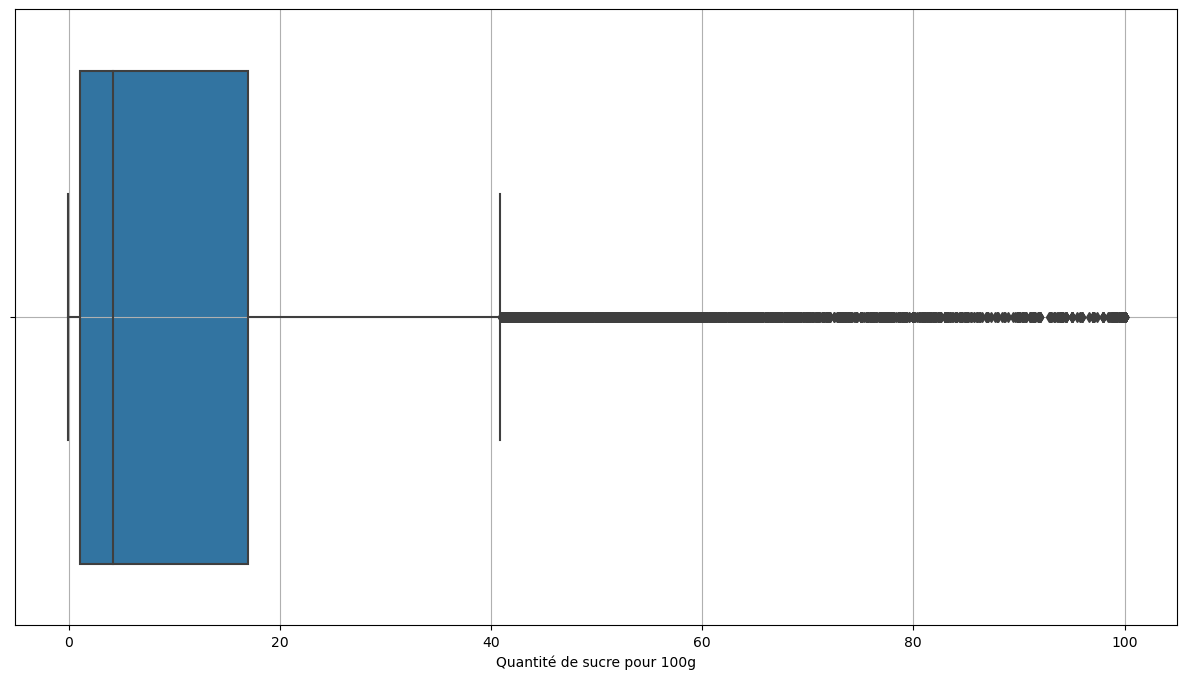

In [47]:
#Boîte à moustaches pour sugars_100g sans les valeurs supérieures à 100g :
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'sugars_100g', orient = "h")
plt.xlabel('Quantité de sucre pour 100g')
plt.grid()
plt.show()

In [48]:
#Sélection des outliers visibles sur le box plot par des points :


q1=df_clean['sugars_100g'].quantile(0.25)
q3=df_clean['sugars_100g'].quantile(0.75)

IQR=q3-q1

outliers = pd.DataFrame()
outliers = df_clean[(df_clean['sugars_100g']<(q1-1.5*IQR)) | (df_clean['sugars_100g']>(q3+1.5*IQR))]
outliers = pd.DataFrame(outliers)
outliers[['sugars_100g', 'product_name']]

,sugars_100g,product_name
106,57.5,Lion Peanut x2
190,87.7,Mini Confettis
191,50.3,Praliné Amande Et Noisette
452,96.0,Curiously Strong Mints
456,41.2,Cookies Cranberry & Orange
...,...,...
320343,55.5,Pascall Family Pack Sweets Fruit Bursts
320450,82.1,Miel De Manuka MGO 400+ - 250G - Manuka Health
320451,57.4,Capricare Lait De Chèvre 2 De 6 Mois à 1 an 400 G
320611,61.0,Sauce Pour Nems


### Les résultats paraissent cohérents avec le nom des produits : ce sont des sucreries, ou des produits que l'on sait sucrés, la proportion de sucre est donc importante.

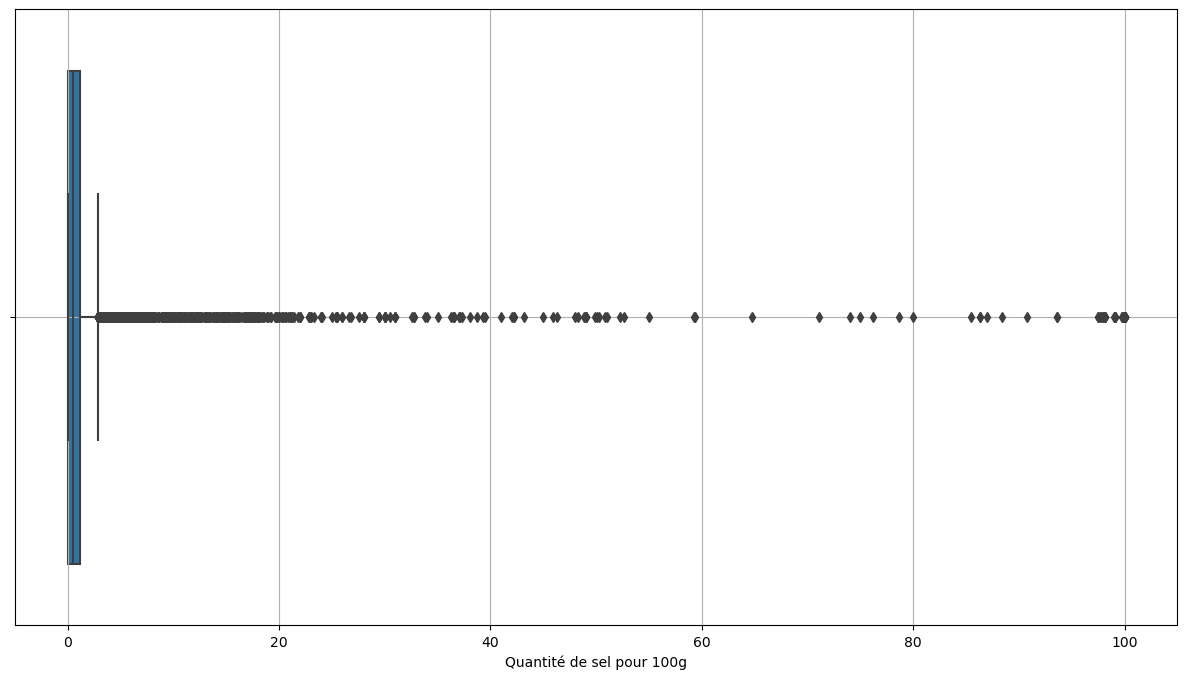

In [49]:
#Boîte à moustaches pour salt_100g sans les valeurs supérieures à 100g :
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'salt_100g', orient = "h")
plt.xlabel('Quantité de sel pour 100g')
plt.grid()
plt.show()

In [50]:
#Liste des outliers pour salt_100g
q1_salt=df_clean['salt_100g'].quantile(0.25)
q3_salt=df_clean['salt_100g'].quantile(0.75)

IQR_salt=q3_salt-q1_salt

outliers_salt = pd.DataFrame()
outliers_salt = df_clean[(df_clean['salt_100g']<(q1_salt-1.5*IQR_salt)) | (df_clean['salt_100g']>(q3_salt+1.5*IQR_salt))]

print(q1_salt-1.5*IQR_salt)
print(q3_salt+1.5*IQR_salt)

print('Liste des produits avec valeurs extrêmes en sel :')
display(df_clean.loc[df_clean['salt_100g']>(q3_salt+1.5*IQR_salt),['salt_100g', 'product_name']] )


-1.6249999999999998
2.8949999999999996
Liste des produits avec valeurs extrêmes en sel :


,salt_100g,product_name
919,3.50000,Moutarde Posh Dog
6570,24.00000,Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G
7368,3.40000,Sriracha Thai Chili Sauce
7387,7.40000,Tabasco Green Pepper Sauce
13153,4.40000,sriracha chili sauce
...,...,...
320607,6.81736,Pâte de Curry Vert
320608,7.37870,Pâte de curry rouge
320613,6.70000,Pâte de curry vert
320624,6.00000,Sauce


In [51]:
df_clean['salt_100g'].describe()

count    50190.000000
mean         1.018853
std          3.617706
min          0.000000
25%          0.070000
50%          0.530000
75%          1.200000
max        100.000000
Name: salt_100g, dtype: float64

In [52]:
outliers_salt = pd.DataFrame(outliers_salt)
outliers_salt[['salt_100g', 'product_name']]

,salt_100g,product_name
919,3.50000,Moutarde Posh Dog
6570,24.00000,Algues Wakame Pour Soupe Ou Salade WEL-PAC 56.7G
7368,3.40000,Sriracha Thai Chili Sauce
7387,7.40000,Tabasco Green Pepper Sauce
13153,4.40000,sriracha chili sauce
...,...,...
320607,6.81736,Pâte de Curry Vert
320608,7.37870,Pâte de curry rouge
320613,6.70000,Pâte de curry vert
320624,6.00000,Sauce


## On observe que les produits indiqués comme ayant beaucoup de sel sont bien des produits très salés

In [53]:
#Etude de la variable ingredients_from_palm_oil_n :
df_clean['ingredients_from_palm_oil_n'].describe()


count    48737.000000
mean         0.067156
std          0.253957
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ingredients_from_palm_oil_n, dtype: float64

   ## On observe que les résultats ne sont pas aberrants.
   

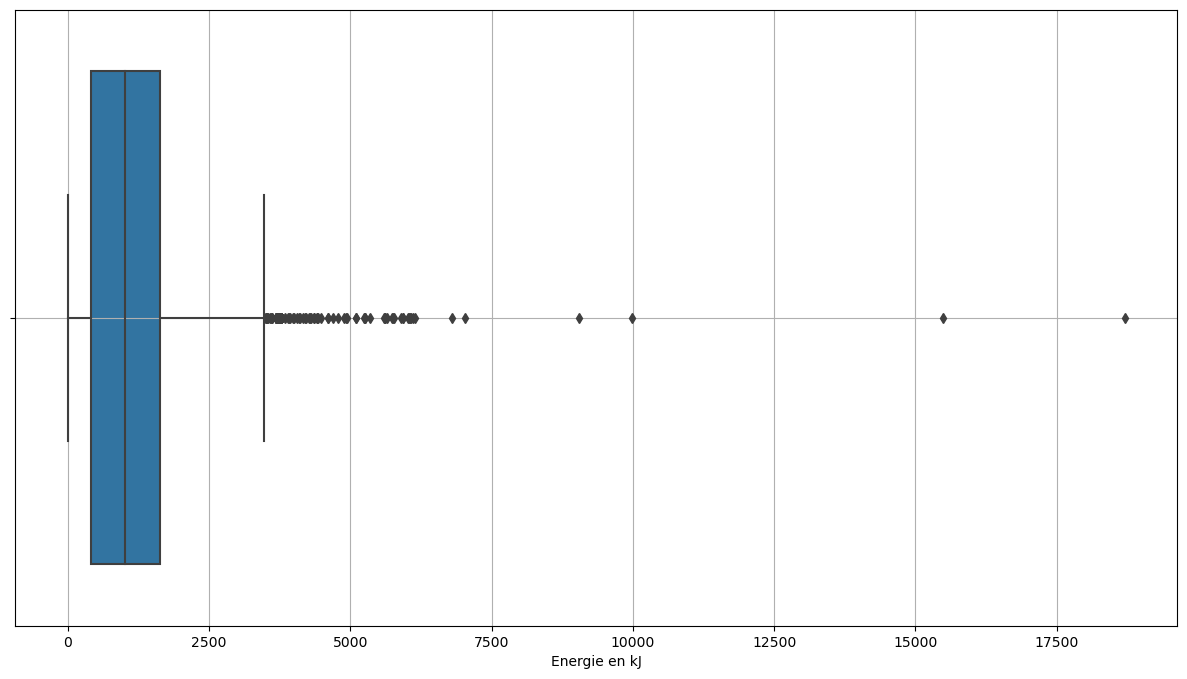

In [54]:
#Boîte à moustaches pour energy_100g :
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'energy_100g', orient = "h")
plt.xlabel('Energie en kJ')
plt.grid()
plt.show()


In [55]:
#Liste des outliers pour energy_100g

q1_energie=df_clean['energy_100g'].quantile(0.25)
q3_energie=df_clean['energy_100g'].quantile(0.75)

IQR_energie=q3_energie-q1_energie

outliers_energie = pd.DataFrame()
outliers_energie = df_clean[(df_clean['energy_100g']<(q1_energie-1.5*IQR_energie)) | (df_clean['energy_100g']>(q3_energie+1.5*IQR_energie))]

print(q1_energie-1.5*IQR_energie)
print(q3_energie+1.5*IQR_energie)

print('Liste des produits avec valeurs extrêmes en énergie :')
display(df_clean.loc[df_clean['energy_100g']>(q3_energie+1.5*IQR_energie),['energy_100g', 'product_name']] )



-1449.0
3495.0
Liste des produits avec valeurs extrêmes en énergie :


,energy_100g,product_name
68125,3766.0,Beurre D'arachide (sans Sel Ni Sucre)
115021,3700.0,Huile d'Olive Vierge Extra Classico
115370,3768.0,extra virgin cocos
177219,3700.0,Frites & Fritures
178567,4197.0,Confiserie Firenze Apfel Streuselkuchen Tiefgefror...
...,...,...
315385,3700.0,Huile d'Olive vierge extra
315860,3766.0,Huile de coco inodore - BioWise - 400 g
316993,3766.0,virgin coconut oil
319695,5925.0,Miel


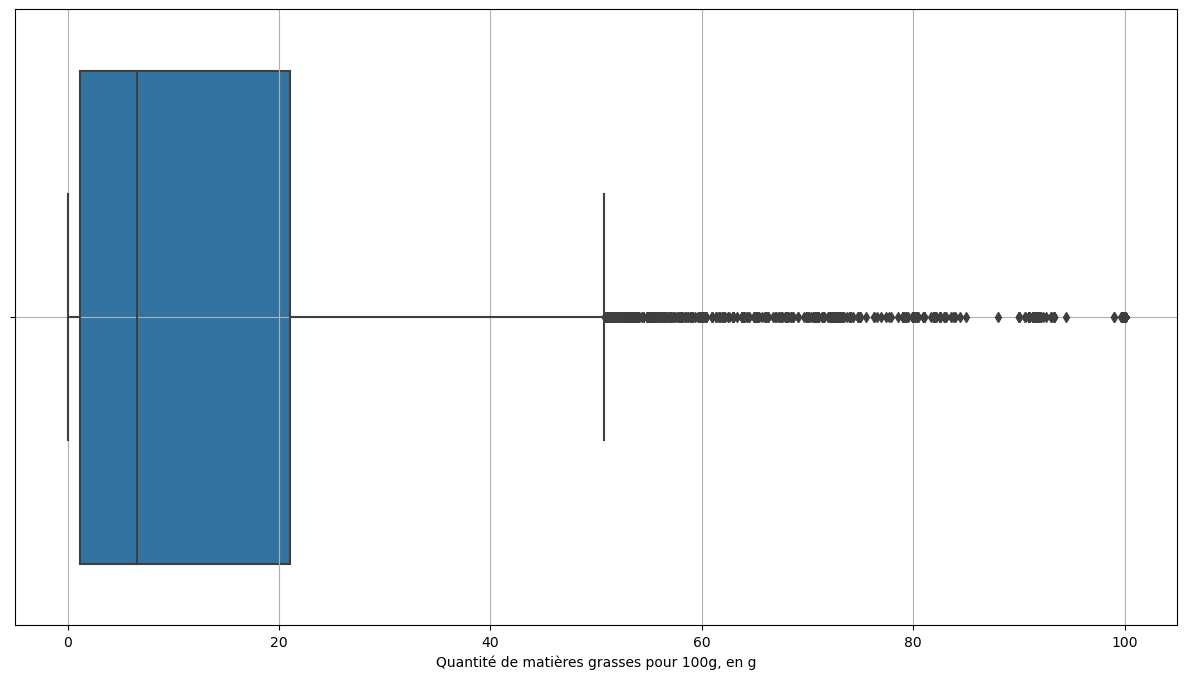

In [56]:
#Boîte à moustaches pour fat_100g sans les valeurs supérieures à 100g :
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'fat_100g', orient = "h")
plt.xlabel('Quantité de matières grasses pour 100g, en g')
plt.grid()
plt.show()

In [57]:
#Liste des outliers pour fat_100g

q1_gras=df_clean['fat_100g'].quantile(0.25)
q3_gras=df_clean['fat_100g'].quantile(0.75)

IQR_gras=q3_gras-q1_gras

outliers_gras = pd.DataFrame()
outliers_gras = df_clean[(df_clean['fat_100g']<(q1_gras-1.5*IQR_gras)) | (df_clean['fat_100g']>(q3_gras+1.5*IQR_gras))]

print(q1_gras-1.5*IQR_gras)
print(q3_gras+1.5*IQR_gras)

print('Liste des produits avec valeurs extrêmes en matières grasses :')
display(df_clean.loc[df_clean['fat_100g']>(q3_gras+1.5*IQR_gras),['fat_100g', 'product_name']] )



-28.500000000000004
50.7
Liste des produits avec valeurs extrêmes en matières grasses :


,fat_100g,product_name
11300,52.1,Almonds Amandes grillées salées
11303,52.1,Amandes Grillées Salées
11356,65.2,Walnuts
11779,55.4,Amandino Blanches
34626,51.6,Beurre de cacahuètes crémeux
...,...,...
316116,60.0,planta fin doux tartine & cuisson
316233,100.0,Mentos Mint Rol
320162,59.4,Chocolat au caramel citron
320578,92.0,Huile de coco vierge


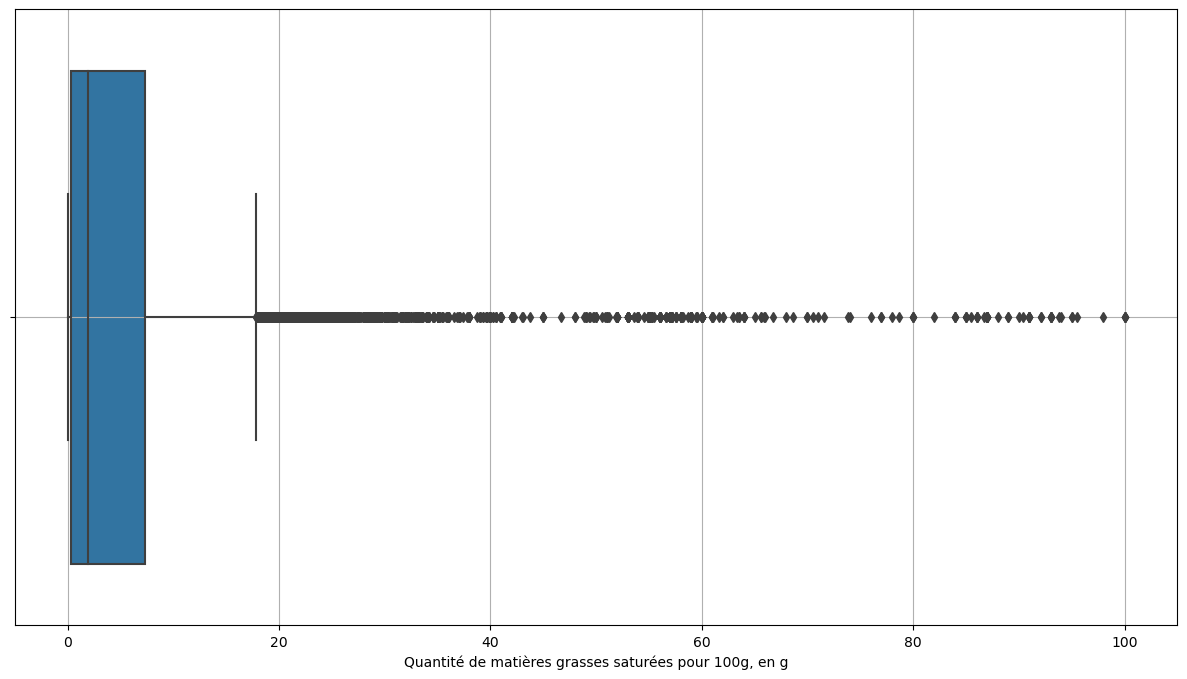

In [58]:
#Boîte à moustaches pour saturated-fat_100g sans les valeurs supérieures à 100g :
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'saturated-fat_100g', orient = "h")
plt.xlabel('Quantité de matières grasses saturées pour 100g, en g')
plt.grid()
plt.show()

In [59]:
#Liste des outliers pour saturated-fat_100g

q1_gras_sat=df_clean['saturated-fat_100g'].quantile(0.25)
q3_gras_sat=df_clean['saturated-fat_100g'].quantile(0.75)

IQR_gras_sat=q3_gras_sat-q1_gras_sat

outliers_gras_sat = pd.DataFrame()
outliers_gras_sat = df_clean[(df_clean['saturated-fat_100g']<(q1_gras_sat-1.5*IQR_gras_sat)) | (df_clean['saturated-fat_100g']>(q3_gras_sat+1.5*IQR_gras_sat))]

print(q1_gras_sat-1.5*IQR_gras_sat)
print(q3_gras_sat+1.5*IQR_gras_sat)

print('Liste des produits avec valeurs extrêmes en matières grasses saturées :')
display(df_clean.loc[df_clean['saturated-fat_100g']>(q3_gras_sat+1.5*IQR_gras_sat),['saturated-fat_100g', 'product_name']] )



-10.2
17.8
Liste des produits avec valeurs extrêmes en matières grasses saturées :


,saturated-fat_100g,product_name
532,20.6,Cornish Cruncher & Balsamic Onion
695,19.7,Mild Cheddar with Onions & Chives
1355,66.7,Cracked Black Pepper & Salted Popped Potato Chips
11080,25.4,Parmesan & Spring Onion Bakes
11179,64.0,Pure Flow Chips Coco Bio
...,...,...
320574,18.0,Lait de coco
320578,86.0,Huile de coco vierge
320589,18.0,Lait de Coco
320598,22.0,Crème de Coco


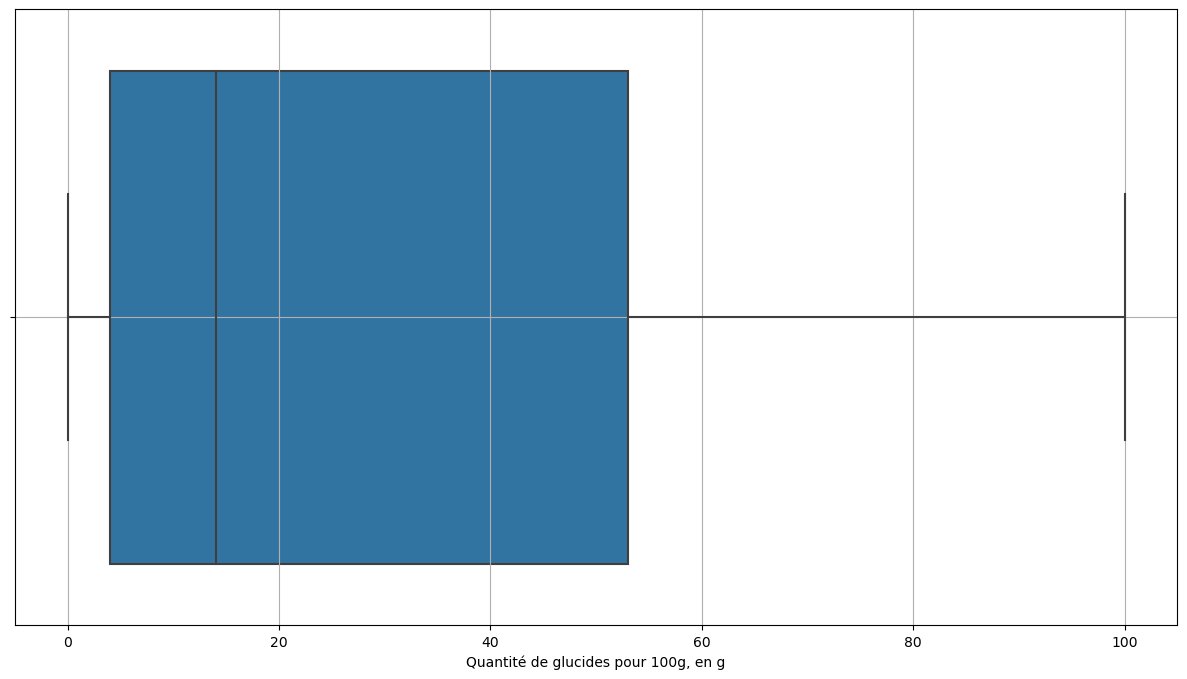

In [60]:
#Boîte à moustaches pour carbohydrates_100g sans les valeurs supérieures à 100g :
plt.figure(figsize=(15,8))
sns.boxplot(data = df_clean, x = 'carbohydrates_100g', orient = "h")
plt.xlabel('Quantité de glucides pour 100g, en g')
plt.grid()
plt.show()

In [61]:
#Liste des outliers pour carbohydrates_100g

q1_gluc=df_clean['carbohydrates_100g'].quantile(0.25)
q3_gluc=df_clean['carbohydrates_100g'].quantile(0.75)

IQR_gluc=q3_gluc-q1_gluc

outliers_gluc = pd.DataFrame()
outliers_gluc = df_clean[(df_clean['carbohydrates_100g']<(q1_gluc-1.5*IQR_gluc)) | (df_clean['carbohydrates_100g']>(q3_gluc+1.5*IQR_gluc))]

print(q1_gluc-1.5*IQR_gluc)
print(q3_gluc+1.5*IQR_gluc)

print('Liste des produits avec valeurs extrêmes en glucides :')
display(df_clean.loc[df_clean['carbohydrates_100g']>(q3_gluc+1.5*IQR_gluc),['carbohydrates_100g', 'product_name']] )



-69.5
126.5
Liste des produits avec valeurs extrêmes en glucides :


,carbohydrates_100g,product_name


## Il n'y a pas d'outlier car le max est à 100g

In [62]:
#Liste des outliers pour proteins_100g

q1_prot=df_clean['proteins_100g'].quantile(0.25)
q3_prot=df_clean['proteins_100g'].quantile(0.75)

IQR_prot=q3_prot-q1_prot

outliers_prot = pd.DataFrame()
outliers_prot = df_clean[(df_clean['proteins_100g']<(q1_prot-1.5*IQR_prot)) | (df_clean['proteins_100g']>(q3_prot+1.5*IQR_prot))]

print(q1_prot-1.5*IQR_prot)
print(q3_prot+1.5*IQR_prot)

print('Liste des produits avec valeurs extrêmes en protéines :')
display(df_clean.loc[df_clean['proteins_100g']>(q3_prot+1.5*IQR_prot),['proteins_100g', 'product_name']] )



-11.9
24.1
Liste des produits avec valeurs extrêmes en protéines :


,proteins_100g,product_name
526,24.5,Honey roast ham
28476,24.9,Grated English Medium Cheddar
29113,25.0,Beurre De Cacahuètes Crémeux
34626,25.3,Beurre de cacahuètes crémeux
34632,25.6,Skippy extra-crunchy supercrunch
...,...,...
317630,26.0,nước mắm
318230,70.9,Whey Protein Vanilla
319192,28.2,Smooth Peanut Butter
319193,30.0,Crunchy Peanut Butter


### Pas de remarque particulière sur les produits riches en protéines

In [63]:
#Liste des outliers pour fiber_100g

q1_fib=df_clean['fiber_100g'].quantile(0.25)
q3_fib=df_clean['fiber_100g'].quantile(0.75)

IQR_fib=q3_fib-q1_fib

outliers_fib = pd.DataFrame()
outliers_fib = df_clean[(df_clean['fiber_100g']<(q1_fib-1.5*IQR_fib)) | (df_clean['fiber_100g']>(q3_fib+1.5*IQR_fib))]

print(q1_fib-1.5*IQR_fib)
print(q3_fib+1.5*IQR_fib)

print('Liste des produits avec valeurs extrêmes en fibres :')
display(df_clean.loc[df_clean['fiber_100g']>(q3_fib+1.5*IQR_fib),['fiber_100g', 'product_name']] )




-4.949999999999999
8.25
Liste des produits avec valeurs extrêmes en fibres :


,fiber_100g,product_name
495,10.0,Black & White Crispbread Sticks
10375,9.9,"Sweet Potato, Parsnip and Beetroot Hand Cooked Vegetable Crisps"
11179,11.0,Pure Flow Chips Coco Bio
13424,9.7,Amandes
14312,18.0,Kashi GoLean Crunch Honey Almond Flax
...,...,...
320528,10.6,Nouilles orientales arôme de boeuf 85 g - Mamee
320530,11.8,Nouilles orientales au curry - 85 g - Mamee
320534,11.8,Curry Flavour
320535,10.6,Instant Noodles


### Pas de remarque particulière sur les produits riches en fibres

In [64]:
df_clean.to_pickle("dataset_clean.pkl")